# **BUSINESS UNDERSTANDING**

## **Background**
Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, Walmart has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. For which it has included four holidays’ weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labor Day.  

## **Problem:**
There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

## **Business Objectives**
Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store?

##  **Evaluation**
It will be evaluated on the RMSE, MAE, MAPE 

# **DATA UNDERSTANDING**
## **Dataset Description**
You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

The following are the files in which the data is included:

### **stores.csv**

This file contains anonymized information about the 45 stores, indicating the type and size of store.

### **train.csv**

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:
 * Store - the store number
 * Dept - the department number
 * Date - the week
 * Weekly_Sales -  sales for the given department in the given store
 * IsHoliday - whether the week is a special holiday week

### **test.csv**

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

### **features.csv**

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:
 * Store - the store number
 * Date - the week
 * Temperature - average temperature in the region
 * Fuel_Price - cost of fuel in the region
 * MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running.
   * MarkDown data is only available after Nov 2011, and is not available for all stores all the time. 
   * Any missing value is marked with an NA.
 * CPI - the consumer price index
 * Unemployment - the unemployment rate
 * IsHoliday - whether the week is a special holiday week

For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):
 * Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
 * Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
 * Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
 * Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
 
# Data Collection
To predict sales of store in a week, we will use the relevant data given to us which includes:
 * stores.csv
 * train.csv
 * features.csv

we'd then combine the dataset to one

## load and check the dataset 

In [144]:
#load necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [145]:
#to see all columns 
pd.options.display.max_columns=100
#load the data
store = pd.read_csv('stores.csv') 
#view the dataset
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [146]:
#load the train set
train = pd.read_csv('train.csv') 
#view the dataset
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [147]:
#load features
feature=pd.read_csv('features.csv')
#view the dataset
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## df
lets merging 3 different sets

In [148]:
# merging 3 different sets
df = train.merge(feature, on=['Store', 'Date'], how='inner').merge(store, on=['Store'], how='inner')
# Display the merged DataFrame
print("\nMerged DataFrame:")
df.head()


Merged DataFrame:


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


# Data preparation
## Data Cleaning
This includes
* exploring our data using methods like(df.head,df.describe,df.info)to get a sense of the data structure,data types and summary statistics
* manipulating column names for better readability
* dropping unnecessary columns
* identify missing values using df.isnull().sum() then fill the missing values appropriately if any,or drop them
* identify duplicates(df.duplicated() and remove them using df.drop_duplicated
* check the data types if they are appropriate for each column if not correct them
* check and handle outliers appropriately
* create new features
* do final checks then save the cleaned data

### Explore the data
This is done to get a sense of the data structure,data types and summary statistics

#### view the dataset
to see how our data looks like

In [149]:
#view the dataset
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


#### dataset info

In [150]:
#checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [151]:
df.shape

(421570, 17)

#### get statistic summary for our dataset

In [152]:
#view statistics for our dataset
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [153]:
#summary statistic for categorical columns
df.describe(include='O')

,Date,Type
count,421570,421570
unique,143,3
top,2011-12-23,A
freq,3027,215478


### Column manipulation
now that we have a sense of how our data is lets begin with column manipulation.

this includes:checking column names to see they are same,change the name to lowercase if necessary,remove whitespaces in the column names and also in the data,rename columns for better understanding and drop unnecessary columns.

#### check column names
to see they are same,change the name to lowercase if necessary

In [154]:
#check columns
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [155]:
#change column names to lowercase
df.columns = df.columns.str.lower()
#check columns
df.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday_x', 'temperature',
       'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4',
       'markdown5', 'cpi', 'unemployment', 'isholiday_y', 'type', 'size'],
      dtype='object')

#### remove whitespaces
Here we are removing the whitepaces found in the column names and ensure that all string and categorical values are clean and consistent

In [156]:
# Strip white spaces in values 
df = df.apply(lambda col: col.str.strip() if col.dtype == ["object", "number", "category"] else col)

#### renaming columns
For better readability and understanding

In [157]:
#renaming column names
df = df.rename(columns = {'dept':'department','isholiday_x':'holiday'})
#check column names
df.columns

Index(['store', 'department', 'date', 'weekly_sales', 'holiday', 'temperature',
       'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4',
       'markdown5', 'cpi', 'unemployment', 'isholiday_y', 'type', 'size'],
      dtype='object')

#### drop unnecessary columns

In [158]:
#drop unnecessary columns
df = df.drop(columns=['isholiday_y'], errors="ignore")
#view the dataset
df.head()

,store,department,date,weekly_sales,holiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type,size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [159]:
print('Number of stores:', df['store'].nunique())  # Count of unique department values
print('Number of departments:', df['department'].nunique())  # Count of unique department values

Number of stores: 45
Number of departments: 81


In [160]:
store_dept_table = pd.pivot_table(df, index='store', columns='department',values='weekly_sales', aggfunc=np.mean)
display(store_dept_table)

C:\Users\lilwa\AppData\Local\Temp\ipykernel_20596\2351618001.py:1: FutureWarning: The provided callable <function mean at 0x0000028FBFEF4B80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  store_dept_table = pd.pivot_table(df, index='store', columns='department',values='weekly_sales', aggfunc=np.mean)


department,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.46

Store numbers begin from 1 to 45, department numbers are from 1 to 99, but some numbers are missing such as there is no 88 or 89 etc. Total number of departments is 81.

From the pivot table, it is obviously seen that there are some wrong values such as there are 0 and minus values for weekly sales. But sales amount can not be minus. Also, it is impossible for one department not to sell anything whole week. So, I will change this values.

In [161]:
df.loc[df['weekly_sales']<=1]

,store,department,date,weekly_sales,holiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type,size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2300,1,18,2010-05-14,0.50,False,74.78,2.854,NaN,NaN,NaN,NaN,NaN,210.337426,7.808,A,151315
2302,1,18,2010-06-11,0.15,False,80.43,2.668,NaN,NaN,NaN,NaN,NaN,211.456095,7.808,A,151315
2303,1,18,2010-08-20,1.00,False,86.65,2.664,NaN,NaN,NaN,NaN,NaN,211.603363,7.787,A,151315
2343,1,18,2011-05-27,0.35,False,77.72,3.786,NaN,NaN,NaN,NaN,NaN,215.503788,7.682,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221
419640,45,80,2011-02-11,-0.24,True,30.30,3.239,NaN,NaN,NaN,NaN,NaN,183.701613,8.549,B,118221


2175 rows in 421570 rows means 0.5%, so I can delete and ignore these rows which contains wrong sales values.

In [162]:
#new dataset
df = df.loc[df['weekly_sales'] > 1]
#view the new dataset
df.head()

,store,department,date,weekly_sales,holiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type,size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [163]:
#checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419395 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         419395 non-null  int64  
 1   department    419395 non-null  int64  
 2   date          419395 non-null  object 
 3   weekly_sales  419395 non-null  float64
 4   holiday       419395 non-null  bool   
 5   temperature   419395 non-null  float64
 6   fuel_price    419395 non-null  float64
 7   markdown1     149824 non-null  float64
 8   markdown2     110655 non-null  float64
 9   markdown3     136321 non-null  float64
 10  markdown4     134216 non-null  float64
 11  markdown5     150572 non-null  float64
 12  cpi           419395 non-null  float64
 13  unemployment  419395 non-null  float64
 14  type          419395 non-null  object 
 15  size          419395 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.6+ MB


In [164]:
df.shape

(419395, 16)

In [165]:
#view statistics for our dataset
df.describe()

,store,department,weekly_sales,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,size
count,419395.000000,419395.000000,419395.000000,419395.000000,419395.000000,149824.000000,110655.000000,136321.000000,134216.000000,150572.000000,419395.000000,419395.000000,419395.000000
mean,22.192492,44.230904,16064.346832,60.072137,3.360778,7249.857573,3336.316369,1445.106837,3385.980776,4628.234977,171.205860,7.960130,136753.348154
std,12.786576,30.498730,22740.591920,18.449178,0.458536,8297.078709,9469.452883,9643.374147,6300.334883,5944.713752,39.159864,1.864009,60987.244247
min,1.000000,1.000000,1.010000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2144.190000,46.670000,2.933000,2240.270000,41.640000,5.100000,502.310000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7695.960000,62.070000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20307.955000,74.260000,3.738000,9210.900000,1943.200000,104.010000,3595.040000,5563.800000,212.416993,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [166]:
#summary statistic for categorical columns
df.describe(include='O')

,date,type
count,419395,419395
unique,143,3
top,2011-11-25,A
freq,3016,214518


### Missing values
We are checking for missing values and find ways to impute them

In [167]:
#create a function to calculate missing values and their percentage
def missing_values_percentage(df):

    # Total rows 
    total_records = len(df)

    # Missing values 
    missing_values = df.isnull().sum()

    # Percent missing values 
    percent_missing_values = (missing_values/ total_records) * 100

    # # Get the data types of each column
    data_types = df.dtypes  

    # create summary dataframe 
    missing_values_df = pd.DataFrame({
         'missing_values': missing_values,
         'percentage (%)': percent_missing_values,
         'data_type': data_types
    })

    print(f"Total records: {total_records}")
    
    return missing_values_df

# View the dataframe 
missing_summary =missing_values_percentage(df)
missing_summary

Total records: 419395


,missing_values,percentage (%),data_type
store,0,0.000000,int64
department,0,0.000000,int64
date,0,0.000000,object
weekly_sales,0,0.000000,float64
holiday,0,0.000000,bool
temperature,0,0.000000,float64
fuel_price,0,0.000000,float64
markdown1,269571,64.276160,float64
markdown2,308740,73.615565,float64
markdown3,283074,67.495798,float64


In [168]:
#filling MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5 with 0
df[["markdown1", "markdown2", "markdown3", "markdown4", "markdown5"]] = df[["markdown1", "markdown2", "markdown3", "markdown4", "markdown5"]].fillna(0)
# View the dataframe 
missing_summary =missing_values_percentage(df)
missing_summary

Total records: 419395


,missing_values,percentage (%),data_type
store,0,0.0,int64
department,0,0.0,int64
date,0,0.0,object
weekly_sales,0,0.0,float64
holiday,0,0.0,bool
temperature,0,0.0,float64
fuel_price,0,0.0,float64
markdown1,0,0.0,float64
markdown2,0,0.0,float64
markdown3,0,0.0,float64


we have no more missing values in our dataset

### **Duplicates**
Identify the duplicates in our dataset and remove them 

In [169]:
#checking for duplicates
dup=df.duplicated().sum()
if dup > 0:
    print(f'\nThere are {dup} duplicates present in our data.')
else:
    print('There are no duplicates in our data.')

There are no duplicates in our data.


### Checking the data types
to see if they are appropriate for each column

In [170]:
df.dtypes

store             int64
department        int64
date             object
weekly_sales    float64
holiday            bool
temperature     float64
fuel_price      float64
markdown1       float64
markdown2       float64
markdown3       float64
markdown4       float64
markdown5       float64
cpi             float64
unemployment    float64
type             object
size              int64
dtype: object

In [171]:
#change the date column to a date format
df['date'] = pd.to_datetime(df['date'])
# Display updated dtypes
print("\nUpdated Data Types:")
df.dtypes


Updated Data Types:


store                    int64
department               int64
date            datetime64[ns]
weekly_sales           float64
holiday                   bool
temperature            float64
fuel_price             float64
markdown1              float64
markdown2              float64
markdown3              float64
markdown4              float64
markdown5              float64
cpi                    float64
unemployment           float64
type                    object
size                     int64
dtype: object

### Checking outliers

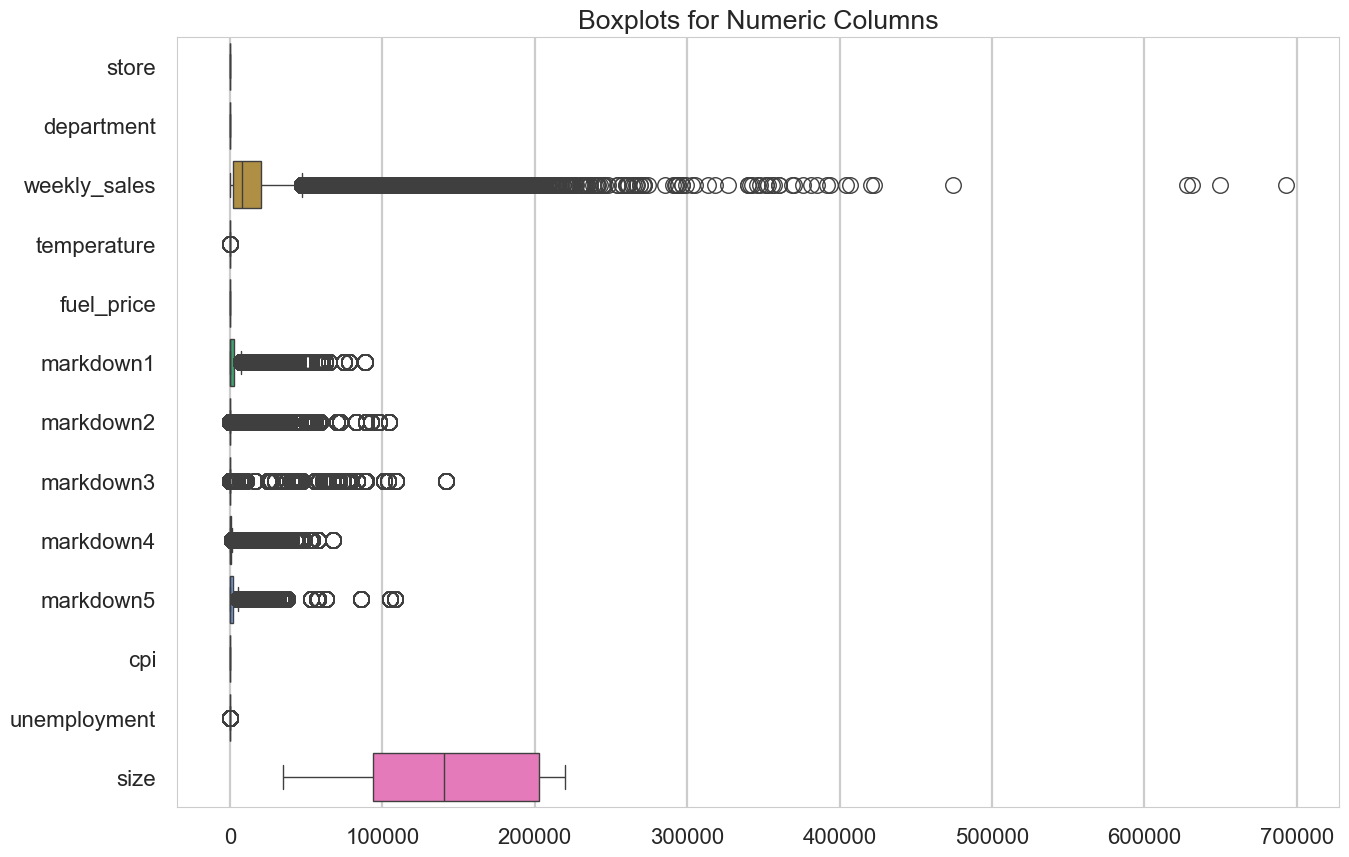

In [172]:
#select numerical columns
numeric_columns=df[['store', 'department', 'weekly_sales', 'temperature', 'fuel_price',
       'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'cpi',
       'unemployment', 'size']] 
# Plot boxplots for all numeric columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_columns, orient='h')
plt.title("Boxplots for Numeric Columns")
plt.show()

there's plenty of outliers but I decided to keep them since they are in sensitive columns

### Feature engineering
this involes making of new columns or transforming existing features

In [173]:
#creating the year,monthand week columns
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.isocalendar().week
#view the dataset
df.head()

,store,department,date,weekly_sales,holiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type,size,year,month,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,9


In [174]:
#superbowl column
df.loc[(df['date'] == '2010-02-12')|(df['date'] == '2011-02-11')|(df['date'] == '2012-02-10'),'super_bowl'] = True
df.loc[(df['date'] != '2010-02-12')&(df['date'] != '2011-02-11')&(df['date'] != '2012-02-10'),'super_bowl'] = False
#view the dataset
df.head()

,store,department,date,weekly_sales,holiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type,size,year,month,week,super_bowl
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,6,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,7,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,8,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,9,False


In [175]:
# Labor day dates in train set
df.loc[(df['date'] == '2010-09-10')|(df['date'] == '2011-09-09')|(df['date'] == '2012-09-07'),'labor_day'] = True
df.loc[(df['date'] != '2010-09-10')&(df['date'] != '2011-09-09')&(df['date'] != '2012-09-07'),'labor_day'] = False

# Thanksgiving dates in train set
df.loc[(df['date'] == '2010-11-26')|(df['date'] == '2011-11-25'),'thanksgiving'] = True
df.loc[(df['date'] != '2010-11-26')&(df['date'] != '2011-11-25'),'thanksgiving'] = False

#Christmas dates in train set
df.loc[(df['date'] == '2010-12-31')|(df['date'] == '2011-12-30'),'christmas'] = True
df.loc[(df['date'] != '2010-12-31')&(df['date'] != '2011-12-30'),'christmas'] = False

#view the dataset
df.head()

,store,department,date,weekly_sales,holiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type,size,year,month,week,super_bowl,labor_day,thanksgiving,christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False,False,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,6,True,False,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,7,False,False,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,8,False,False,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,9,False,False,False,False


### final checks
we review the data to ensure the cleaning steps have been applied correctly

In [176]:
#view the dataset
df.head()

,store,department,date,weekly_sales,holiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type,size,year,month,week,super_bowl,labor_day,thanksgiving,christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False,False,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,6,True,False,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,7,False,False,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,8,False,False,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,9,False,False,False,False


In [177]:
#check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419395 entries, 0 to 421569
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         419395 non-null  int64         
 1   department    419395 non-null  int64         
 2   date          419395 non-null  datetime64[ns]
 3   weekly_sales  419395 non-null  float64       
 4   holiday       419395 non-null  bool          
 5   temperature   419395 non-null  float64       
 6   fuel_price    419395 non-null  float64       
 7   markdown1     419395 non-null  float64       
 8   markdown2     419395 non-null  float64       
 9   markdown3     419395 non-null  float64       
 10  markdown4     419395 non-null  float64       
 11  markdown5     419395 non-null  float64       
 12  cpi           419395 non-null  float64       
 13  unemployment  419395 non-null  float64       
 14  type          419395 non-null  object        
 15  size          419395 n

In [178]:
#reset index
df.reset_index(drop=True, inplace=True)

In [179]:
#review the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419395 entries, 0 to 419394
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         419395 non-null  int64         
 1   department    419395 non-null  int64         
 2   date          419395 non-null  datetime64[ns]
 3   weekly_sales  419395 non-null  float64       
 4   holiday       419395 non-null  bool          
 5   temperature   419395 non-null  float64       
 6   fuel_price    419395 non-null  float64       
 7   markdown1     419395 non-null  float64       
 8   markdown2     419395 non-null  float64       
 9   markdown3     419395 non-null  float64       
 10  markdown4     419395 non-null  float64       
 11  markdown5     419395 non-null  float64       
 12  cpi           419395 non-null  float64       
 13  unemployment  419395 non-null  float64       
 14  type          419395 non-null  object        
 15  size          419

# EXPLORATORY DATA ANALYSIS

## average weekly sales between holiday and non-holiday weeks.

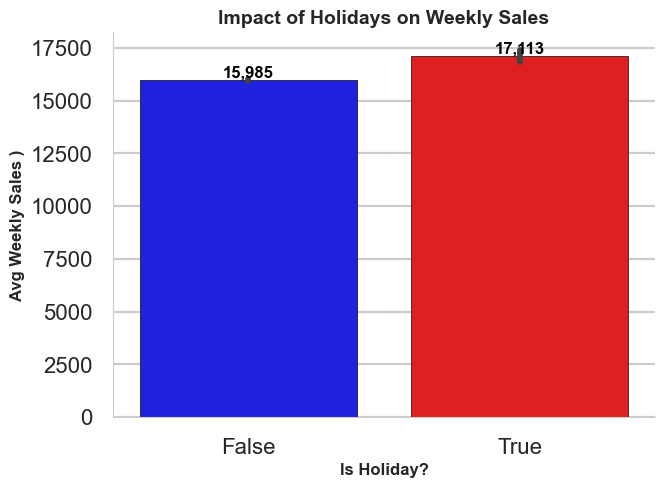

In [180]:
# Set style
sns.set_style("whitegrid")

# Define colors: Blue for non-holidays, Red for holidays
colors = {False: "blue", True: "red"}

# Create the figure
plt.figure(figsize=(7, 5))

# Create the bar plot with hue
ax = sns.barplot(x='holiday', y='weekly_sales', hue='holiday', data=df, 
                 palette=colors, edgecolor="black", legend=False)  

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')

# Customize labels & title
plt.xlabel("Is Holiday?", fontsize=12, fontweight='bold')
plt.ylabel("Avg Weekly Sales )", fontsize=12, fontweight='bold')
plt.title("Impact of Holidays on Weekly Sales", fontsize=14, fontweight='bold')

# Remove unnecessary top & right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

**Impact of Holidays on Weekly Sales**
The bar plot shows the difference in average weekly sales based on whether a week includes a holiday (True) or not (False).

**Key Observations:**
 * Higher Sales During Holidays
 * The red bar represents weeks that include a holiday.
 * The blue bar represents regular weeks (no holidays).
 * Holidays lead to an increase in average weekly sales.
 * Sales during holiday weeks (17,113) are higher than non-holiday weeks (15,985).

**Why Do Sales Increase?**
 * Holidays like Christmas, Thanksgiving, Super Bowl, and Labor Day drive higher consumer spending.
 * People shop more for gifts, food, and seasonal promotions.
 * Retailers offer discounts and run special promotions during these periods.

**Business Implications for Walmart:**
 * Walmart can leverage these trends by increasing stock, optimizing promotions, and adjusting staffing levels.
 * Forecasting sales around holiday periods can prevent stock shortages and maximize revenue.

**Conclusion:**
 * Holidays positively impact sales, and Walmart should focus on marketing, inventory management, and promotions around these peak seasons to boost profitability. 

## how different holidays affect weekly sales

### christmas

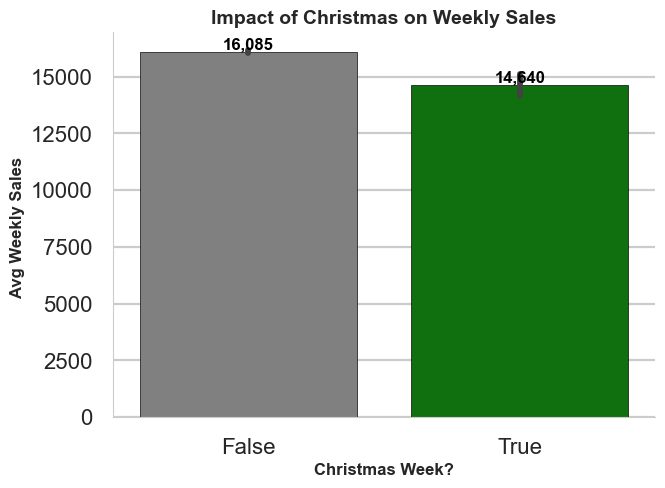

In [181]:
# Set style
sns.set_style("whitegrid")

# Define colors: Blue for non-holidays, Red for holidays
colors = {False: "gray", True: "green"}

# Create the figure
plt.figure(figsize=(7, 5))

# Create the bar plot with hue
ax = sns.barplot(x='christmas', y='weekly_sales', hue='christmas', data=df, 
                 palette=colors, edgecolor="black", legend=False)  

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')

# Customize labels & title
plt.xlabel("Christmas Week?", fontsize=12, fontweight='bold')
plt.ylabel("Avg Weekly Sales ", fontsize=12, fontweight='bold')
plt.title("Impact of Christmas on Weekly Sales", fontsize=14, fontweight='bold')

# Remove unnecessary top & right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

### thanksgiving

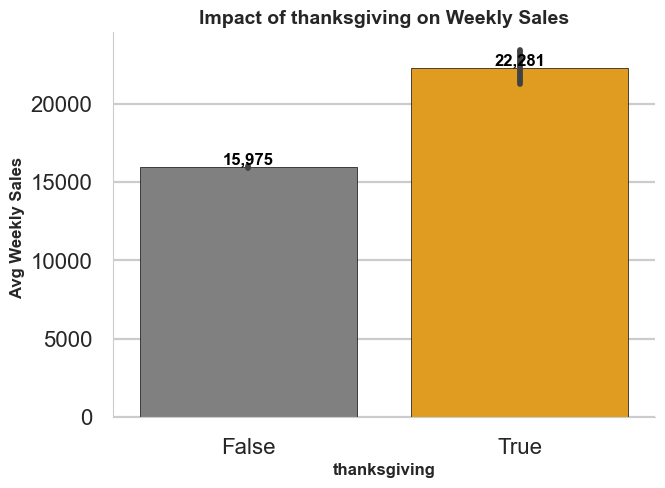

In [182]:
# Set style
sns.set_style("whitegrid")

# Define colors: Blue for non-holidays, Red for holidays
colors = {False: "gray", True: "orange"}

# Create the figure
plt.figure(figsize=(7, 5))

# Create the bar plot with hue
ax = sns.barplot(x='thanksgiving', y='weekly_sales', hue='thanksgiving', data=df, 
                 palette=colors, edgecolor="black", legend=False)  

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')

# Customize labels & title
plt.xlabel("thanksgiving", fontsize=12, fontweight='bold')
plt.ylabel("Avg Weekly Sales ", fontsize=12, fontweight='bold')
plt.title("Impact of thanksgiving on Weekly Sales", fontsize=14, fontweight='bold')

# Remove unnecessary top & right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

### super bowl

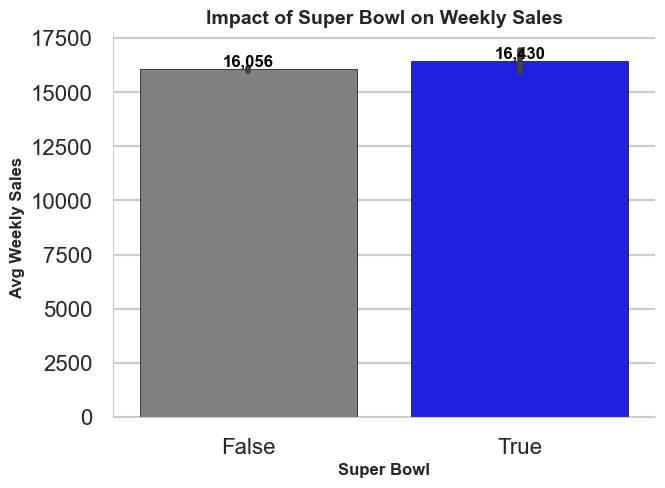

In [183]:
# Set style
sns.set_style("whitegrid")

# Define colors: Blue for non-holidays, Red for holidays
colors = {False: "gray", True: "blue"}

# Create the figure
plt.figure(figsize=(7, 5))

# Create the bar plot with hue
ax = sns.barplot(x='super_bowl', y='weekly_sales', hue='super_bowl', data=df, 
                 palette=colors, edgecolor="black", legend=False)  

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')

# Customize labels & title
plt.xlabel("Super Bowl", fontsize=12, fontweight='bold')
plt.ylabel("Avg Weekly Sales ", fontsize=12, fontweight='bold')
plt.title("Impact of Super Bowl on Weekly Sales", fontsize=14, fontweight='bold')

# Remove unnecessary top & right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

### labor day

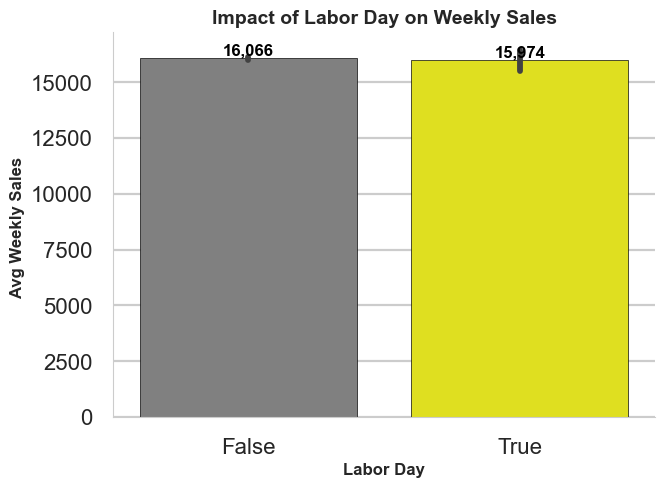

In [184]:
# Set style
sns.set_style("whitegrid")

# Define colors: Blue for non-holidays, Red for holidays
colors = {False: "gray", True: "yellow"}

# Create the figure
plt.figure(figsize=(7, 5))

# Create the bar plot with hue
ax = sns.barplot(x='labor_day', y='weekly_sales', hue='labor_day', data=df, 
                 palette=colors, edgecolor="black", legend=False)  

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')

# Customize labels & title
plt.xlabel("Labor Day", fontsize=12, fontweight='bold')
plt.ylabel("Avg Weekly Sales ", fontsize=12, fontweight='bold')
plt.title("Impact of Labor Day on Weekly Sales", fontsize=14, fontweight='bold')

# Remove unnecessary top & right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

## Types vs weekly sale

### Different Store Types Based on Weekly Sales

C:\Users\lilwa\AppData\Local\Temp\ipykernel_20596\592072481.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='type', y='weekly_sales', data=df, palette=colors, edgecolor="black")


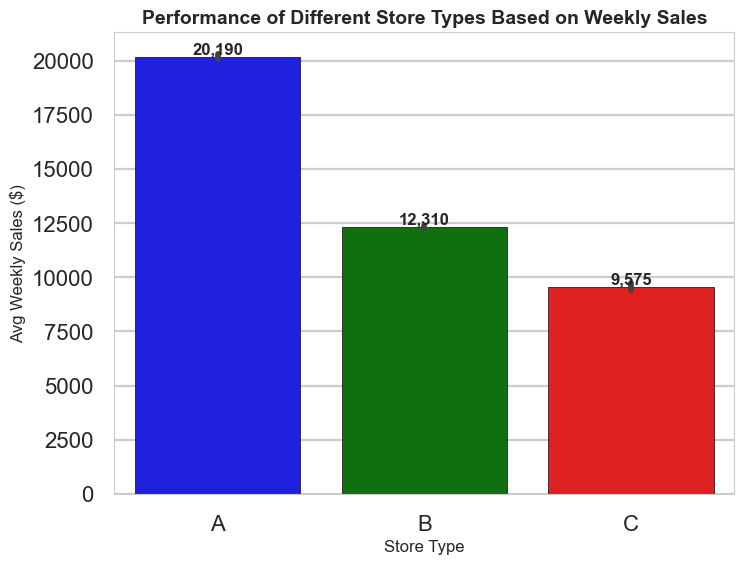

In [185]:
# Set a color palette for different store types
colors = ["blue", "green", "red"]  # Adjust colors based on your dataset

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='type', y='weekly_sales', data=df, palette=colors, edgecolor="black")

# Customize title and labels
plt.title("Performance of Different Store Types Based on Weekly Sales", fontsize=14, fontweight='bold')
plt.xlabel("Store Type", fontsize=12)
plt.ylabel("Avg Weekly Sales ($)", fontsize=12)

# Display values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

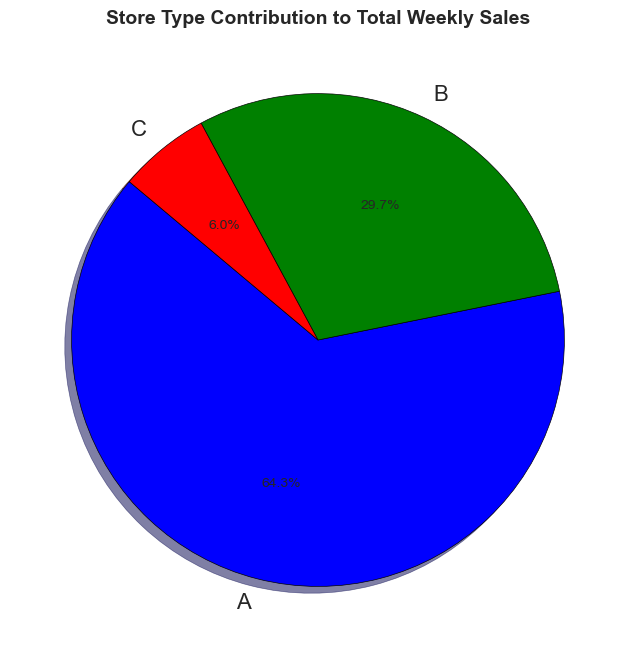

In [186]:
# Group by store type and sum up weekly sales
store_sales = df.groupby('type')['weekly_sales'].sum()

# Define colors for store types
colors = ['blue', 'green', 'red']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(store_sales, labels=store_sales.index, autopct='%1.1f%%', colors=colors, startangle=140, shadow=True, wedgeprops={'edgecolor': 'black'})

# Customize title
plt.title("Store Type Contribution to Total Weekly Sales", fontsize=14, fontweight='bold')

# Show the plot
plt.show()

There are three different store types in the data as A, B and C.

In [187]:
df.groupby(['christmas','type'])['weekly_sales'].mean()  # Avg weekly sales for types on Christmas 

christmas  type
False      A       20216.607458
           B       12321.946219
           C        9596.620106
True       A       18310.167535
           B       11494.007055
           C        8045.085676
Name: weekly_sales, dtype: float64

In [188]:
df.groupby(['labor_day','type'])['weekly_sales'].mean()  # Avg weekly sales for types on Labor Day

labor_day  type
False      A       20192.569901
           B       12314.810321
           C        9566.718129
True       A       20057.293037
           B       12098.520941
           C        9960.682152
Name: weekly_sales, dtype: float64

In [189]:
df.groupby(['thanksgiving','type'])['weekly_sales'].mean()  # Avg weekly sales for types on Thanksgiving

thanksgiving  type
False         A       20085.805450
              B       12217.511042
              C        9573.210700
True          A       27415.794942
              B       18742.079991
              C        9696.566616
Name: weekly_sales, dtype: float64

In [190]:
df.groupby(['super_bowl','type'])['weekly_sales'].mean()  # Avg weekly sales for types on Super Bowl

super_bowl  type
False       A       20180.063159
            B       12306.818767
            C        9562.093349
True        A       20635.423338
            B       12470.660407
            C       10179.271884
Name: weekly_sales, dtype: float64

In [191]:
df.groupby('holiday')['weekly_sales'].mean()

holiday
False    15984.895454
True     17113.405313
Name: weekly_sales, dtype: float64

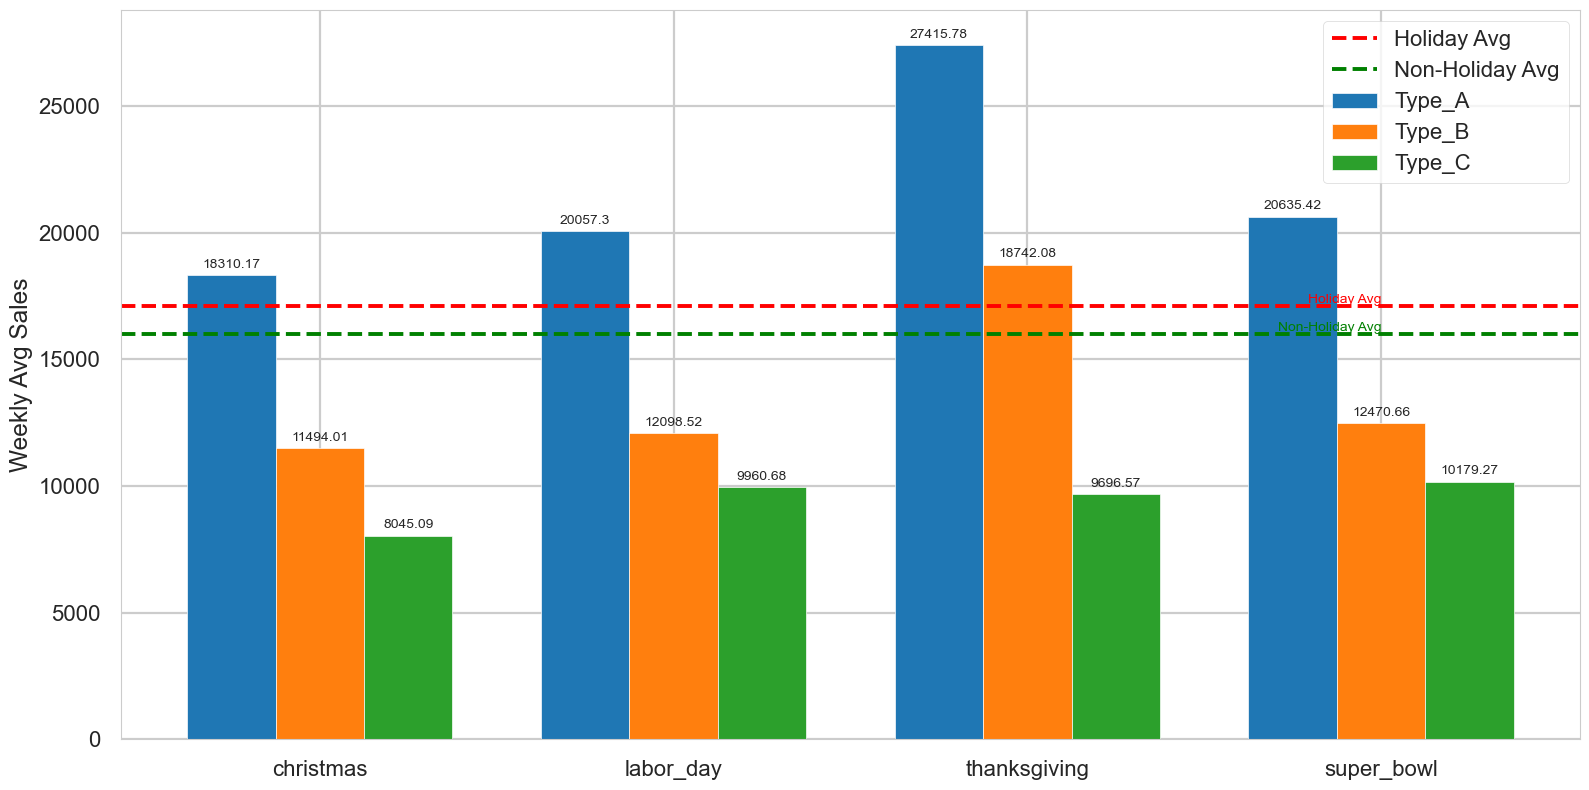

In [192]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-v0_8-poster')
labels = ['christmas','labor_day','thanksgiving','super_bowl']
A_means = [18310.17,20057.30,27415.78,20635.42]
B_means = [11494.01,12098.52,18742.08,12470.66]
C_means = [8045.09,9960.68,9696.57,10179.27]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17113.41, color='r', linestyle='--', label='Holiday Avg')
plt.text(x[-1], 17113.41, 'Holiday Avg', color='r', va='bottom', ha='right')
plt.axhline(y=15984.90, color='green', linestyle='--', label='Non-Holiday Avg')
plt.text(x[-1], 15984.90, 'Non-Holiday Avg', color='green', va='bottom', ha='right')
ax.legend()


fig.tight_layout()

plt.show()

## Size - Type Relation

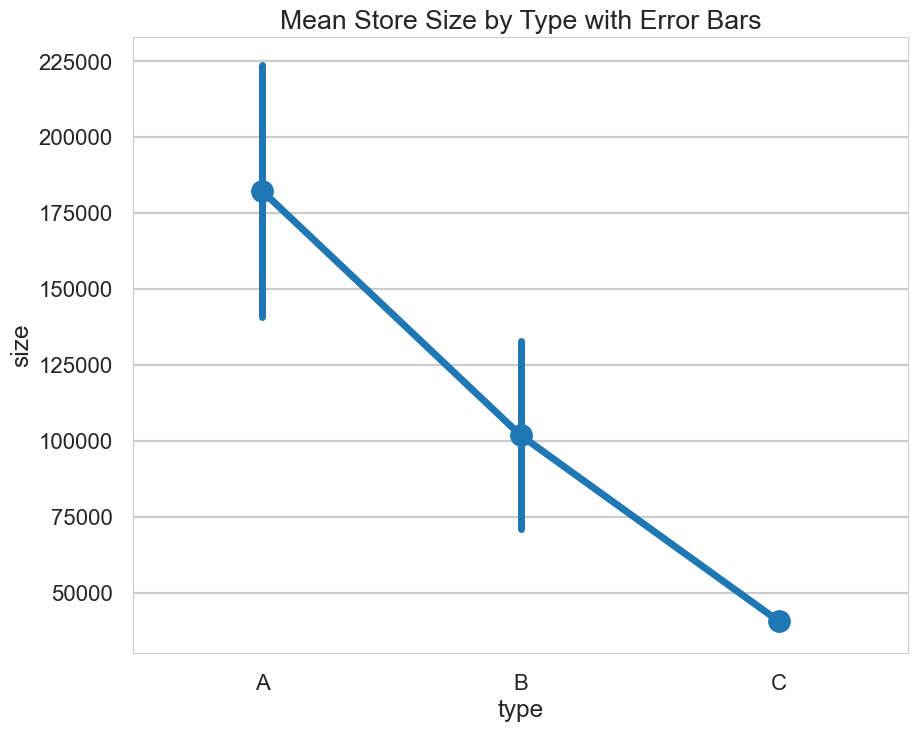

In [193]:
plt.figure(figsize=(10, 8))
sns.pointplot(x='type', y='size', data=df, estimator=np.mean, errorbar='sd')
plt.title("Mean Store Size by Type with Error Bars")
plt.show()

**Interpretation of the Point Plot:**
This point plot displays the mean store size for each store type (A, B, C) along with error bars representing standard deviation.

**Key Observations:**
 * **Type A stores**
    * Have the largest average size, around 180,000+ square units.
    * Show a high standard deviation (large error bars), meaning there is significant variability in store sizes within Type A.

 * **Type B stores**
    * Have a medium average size, around 110,000+ square units.
    * Also show noticeable variability but less than Type A.

 * **Type C stores**
    * Have the smallest average size, around 50,000 square units.
    * Have minimal variation, indicating that Type C stores are relatively uniform in size.

**Overall Interpretation:**
 * Store Type A has the largest stores, but their sizes vary widely.
 * Store Type B is mid-sized with some variability.
 * Store Type C has consistently small stores with little variation.

The downward trend suggests that as the store type changes from A → B → C, the average size decreases significantly.

## Sales

### Weekly Sales by Department

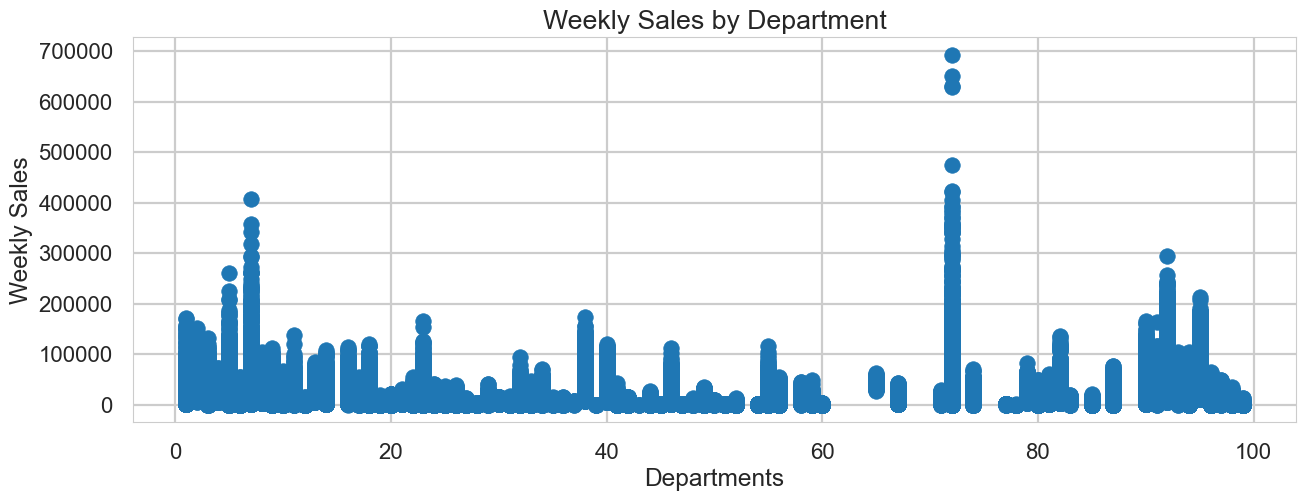

In [194]:
x = df['department']
y = df['weekly_sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

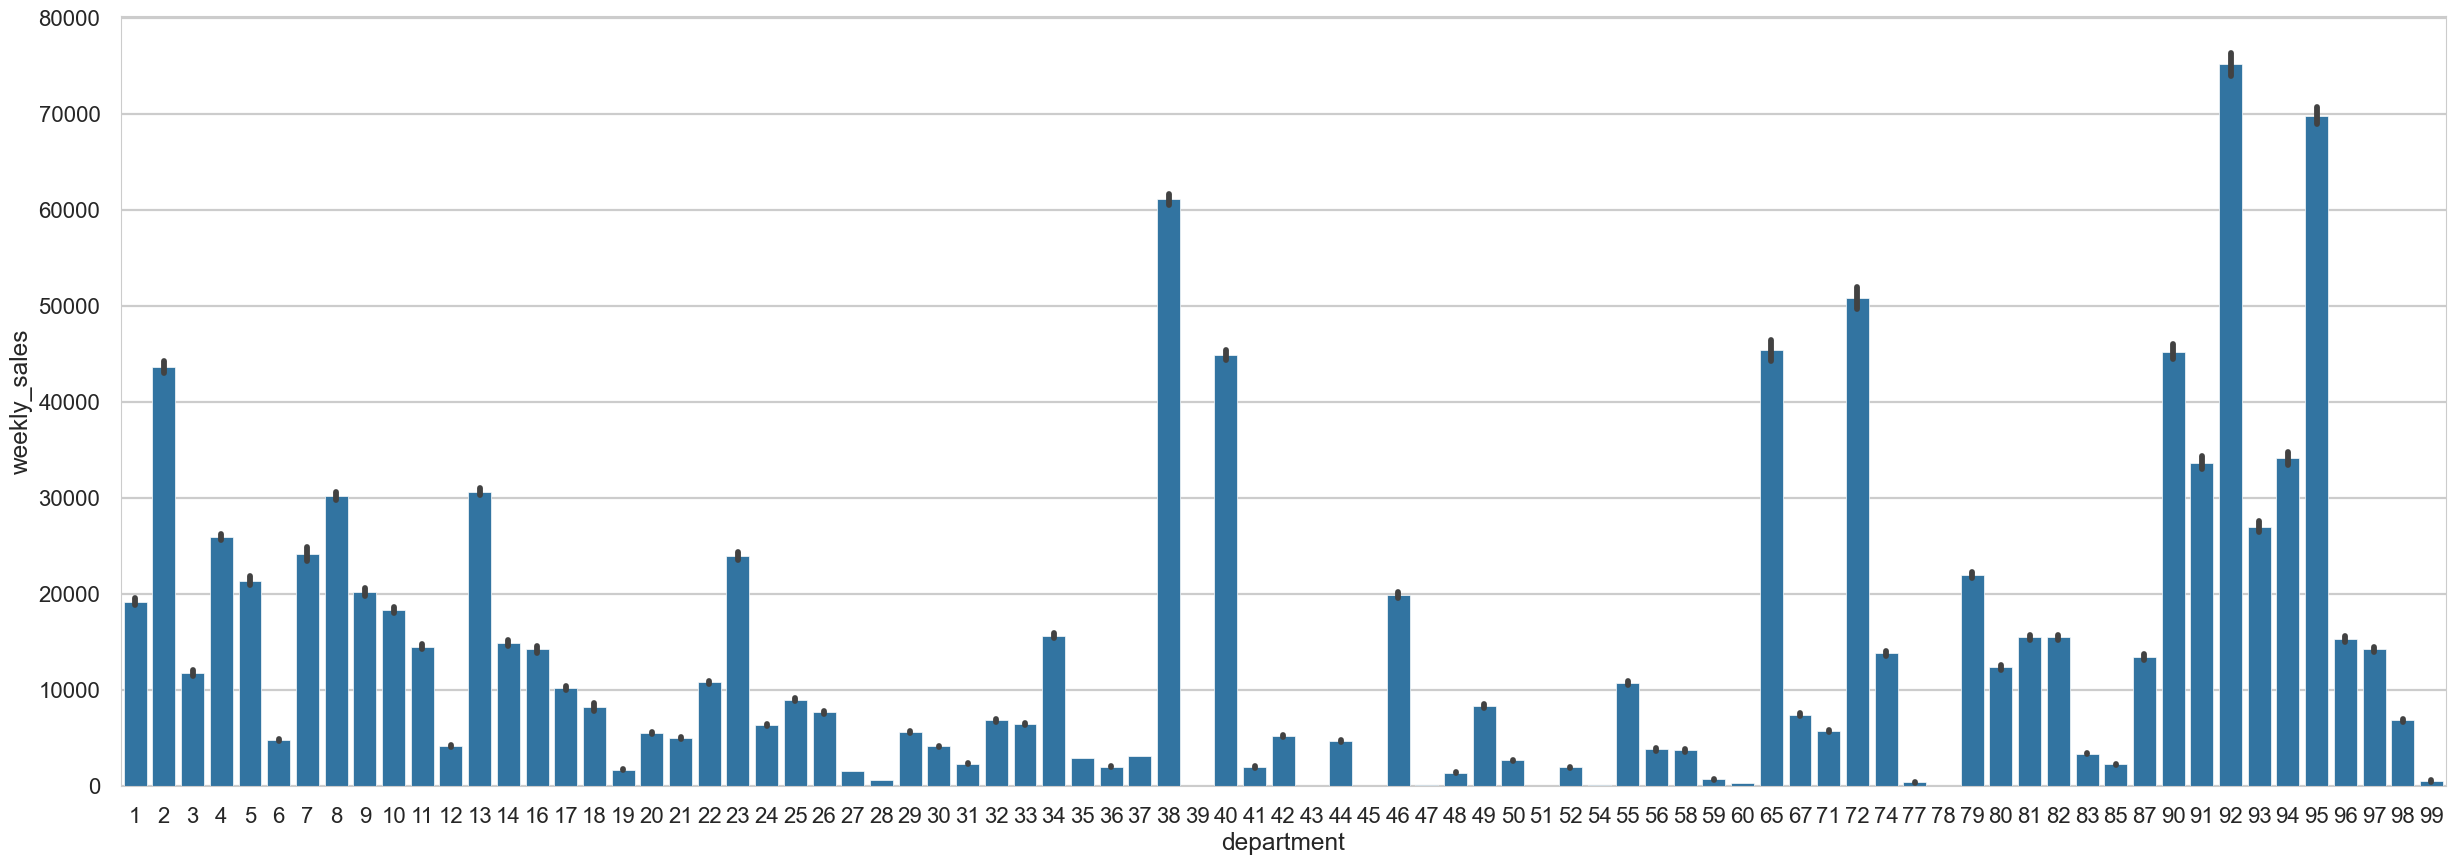

In [195]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='department', y='weekly_sales', data=df)

### Weekly Sales by Store

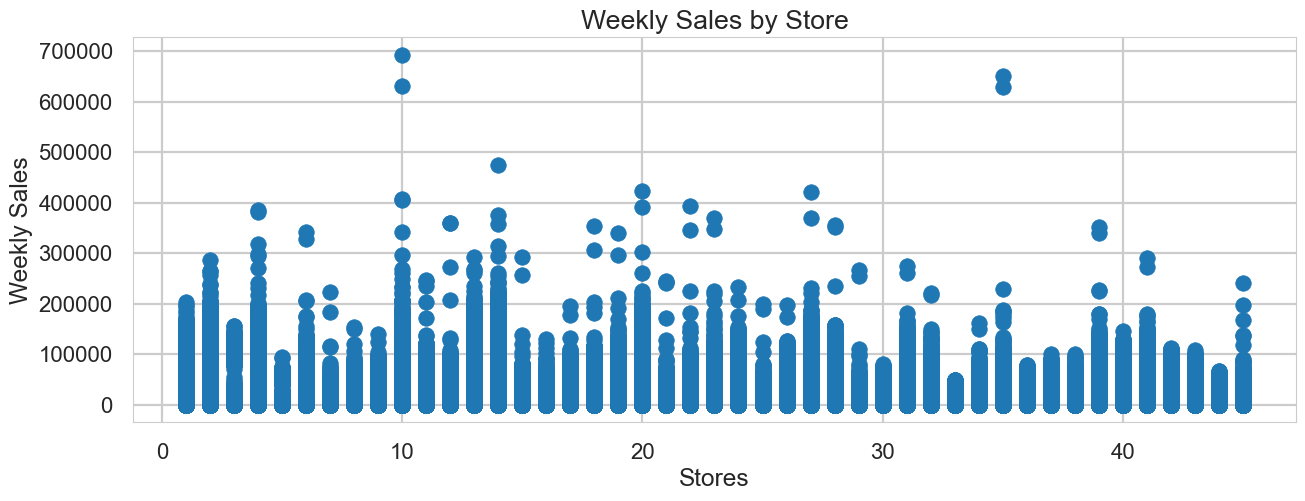

In [196]:
x = df['store']
y = df['weekly_sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

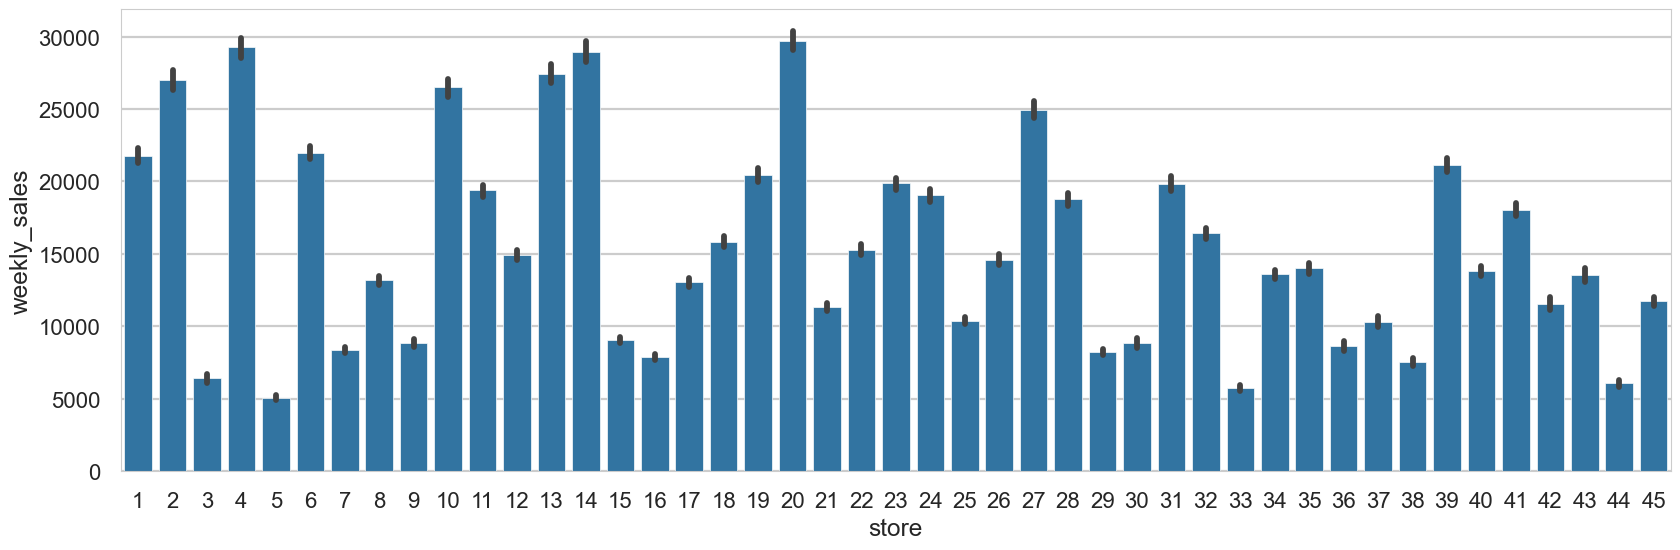

In [197]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='store', y='weekly_sales', data=df)

### weekly sales across months in the different years 

<Axes: xlabel='month'>

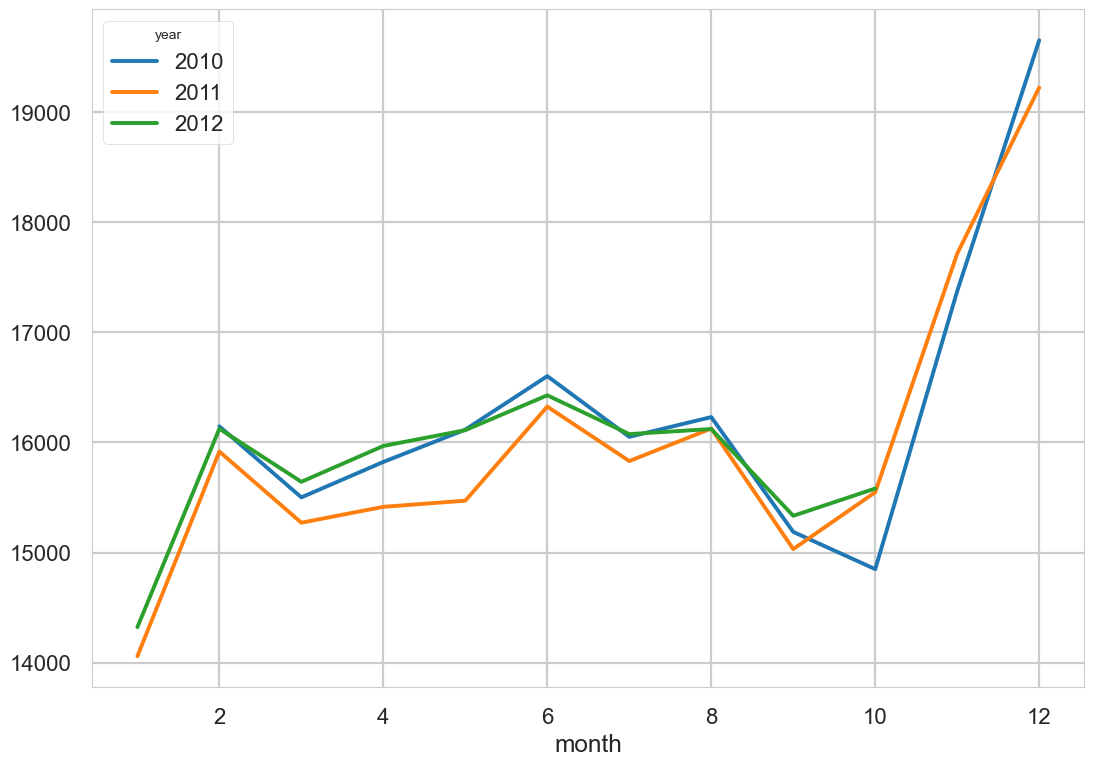

In [198]:
monthly_sales = pd.pivot_table(df, values = "weekly_sales", columns = "year", index = "month")
monthly_sales.plot()

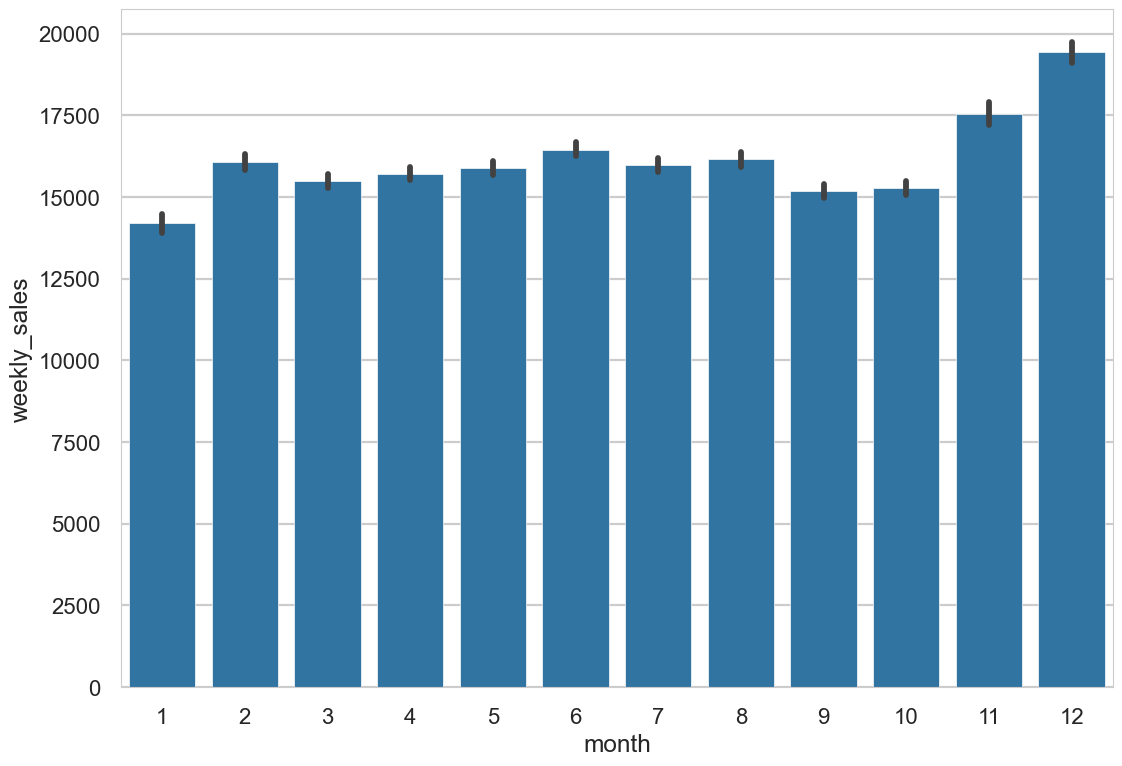

In [199]:
fig = sns.barplot(x='month', y='weekly_sales', data=df)

### weekly sales across weeks in the different years

<Axes: xlabel='week'>

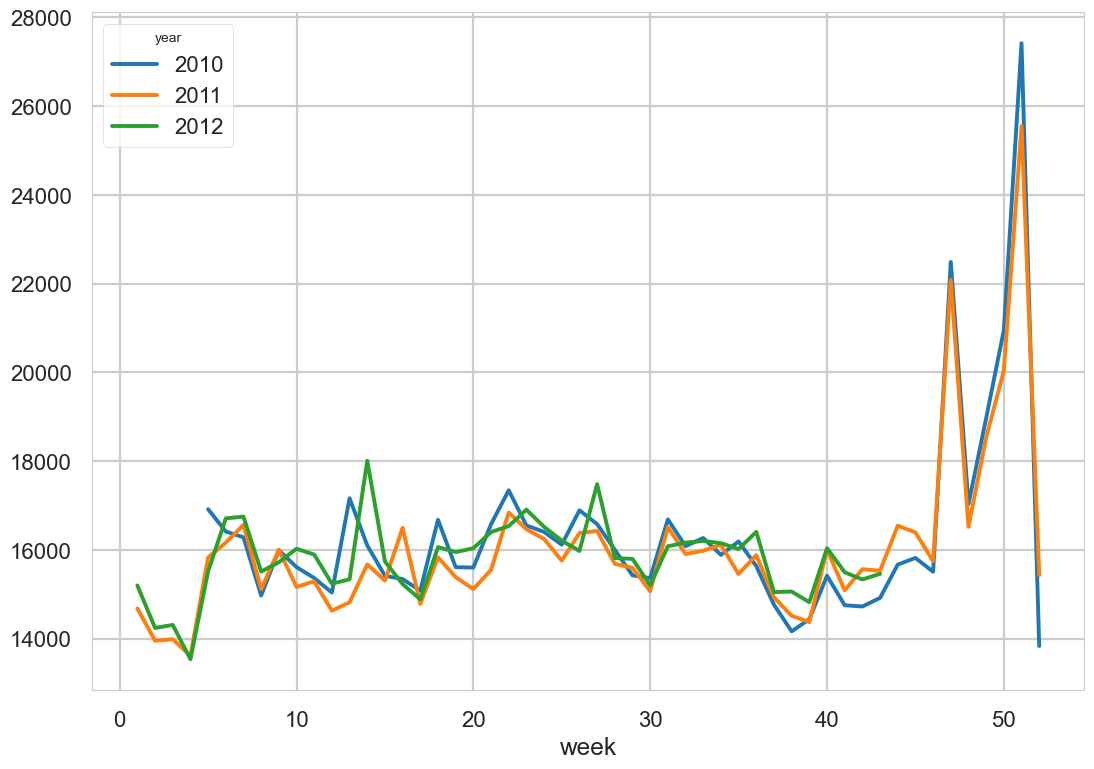

In [200]:
sales_by_weeks = pd.pivot_table(df, values = "weekly_sales", columns = "year", index = "week")
sales_by_weeks.plot()

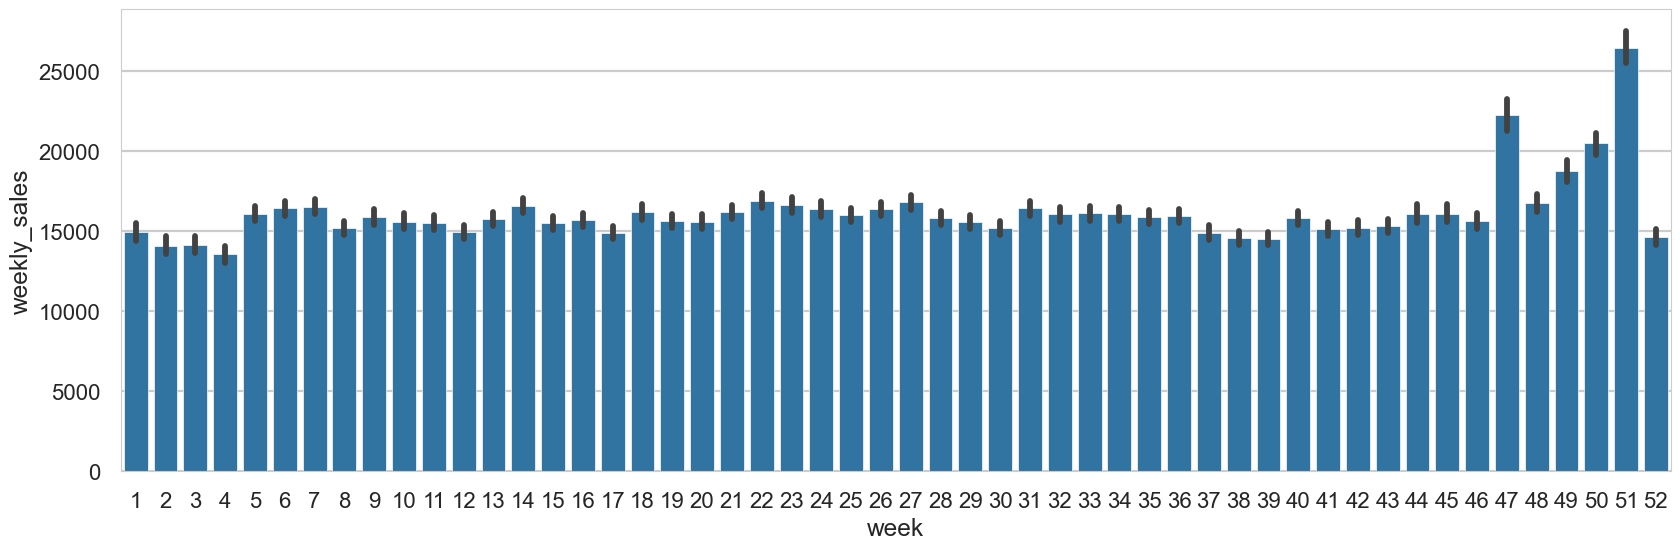

In [201]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='weekly_sales', data=df)

### Effects of Fuel Price, CPI , Unemployment and Temperature on sales

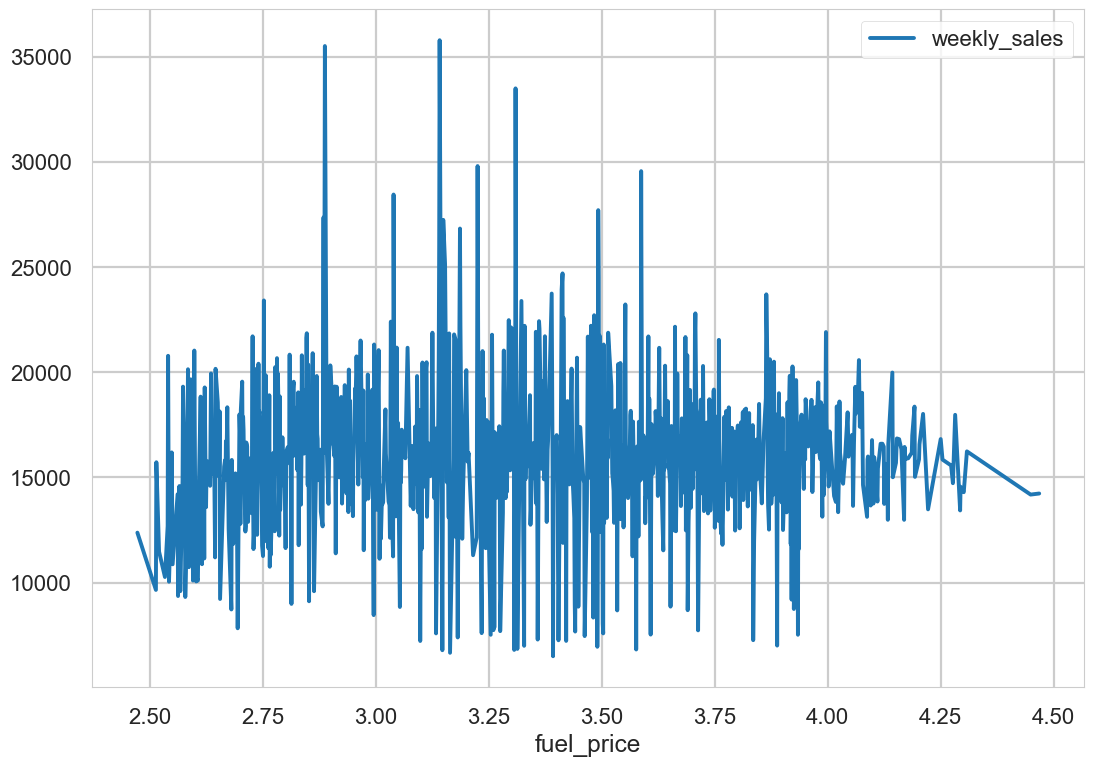

In [202]:
fuel_price = pd.pivot_table(df, values = "weekly_sales", index= "fuel_price")
fuel_price.plot();

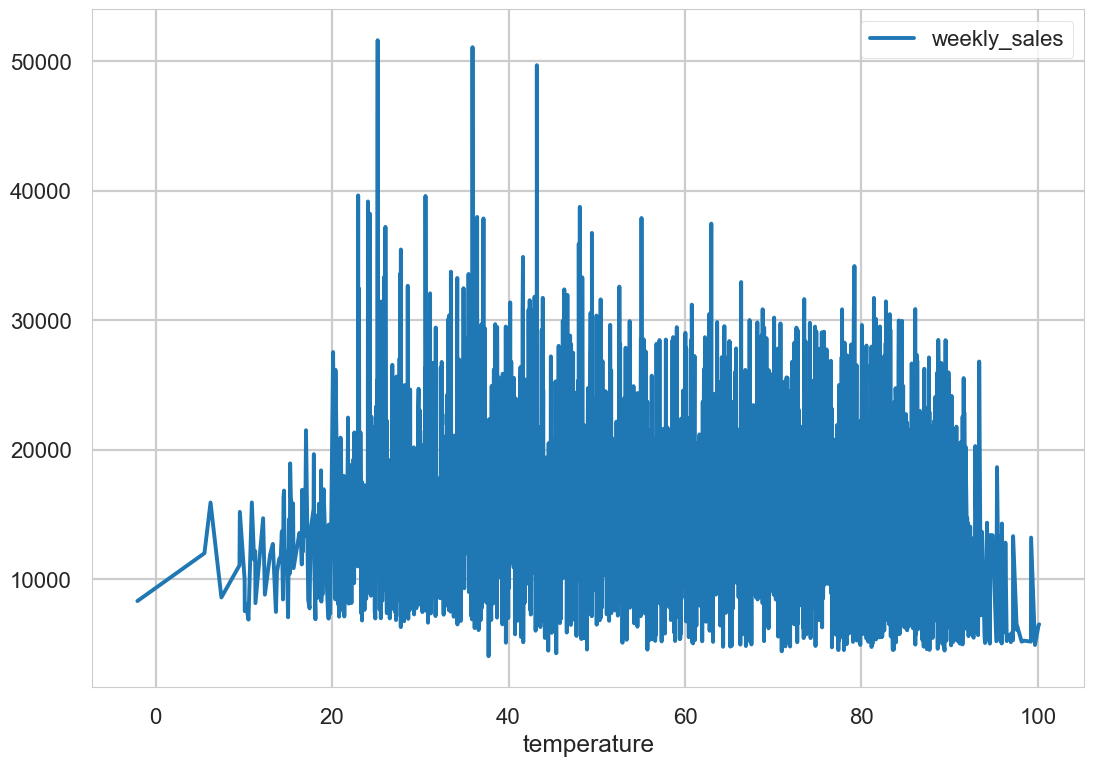

In [203]:
temp = pd.pivot_table(df, values = "weekly_sales", index= "temperature")
temp.plot();

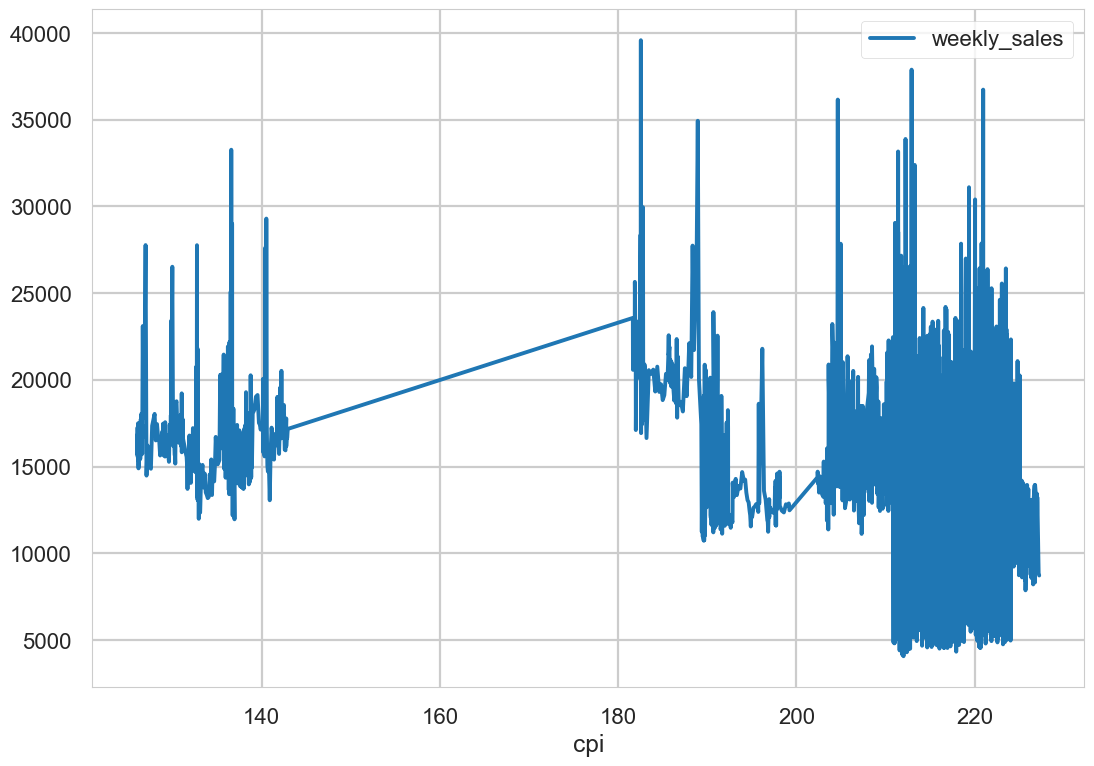

In [204]:
CPI = pd.pivot_table(df, values = "weekly_sales", index= "cpi")
CPI.plot();

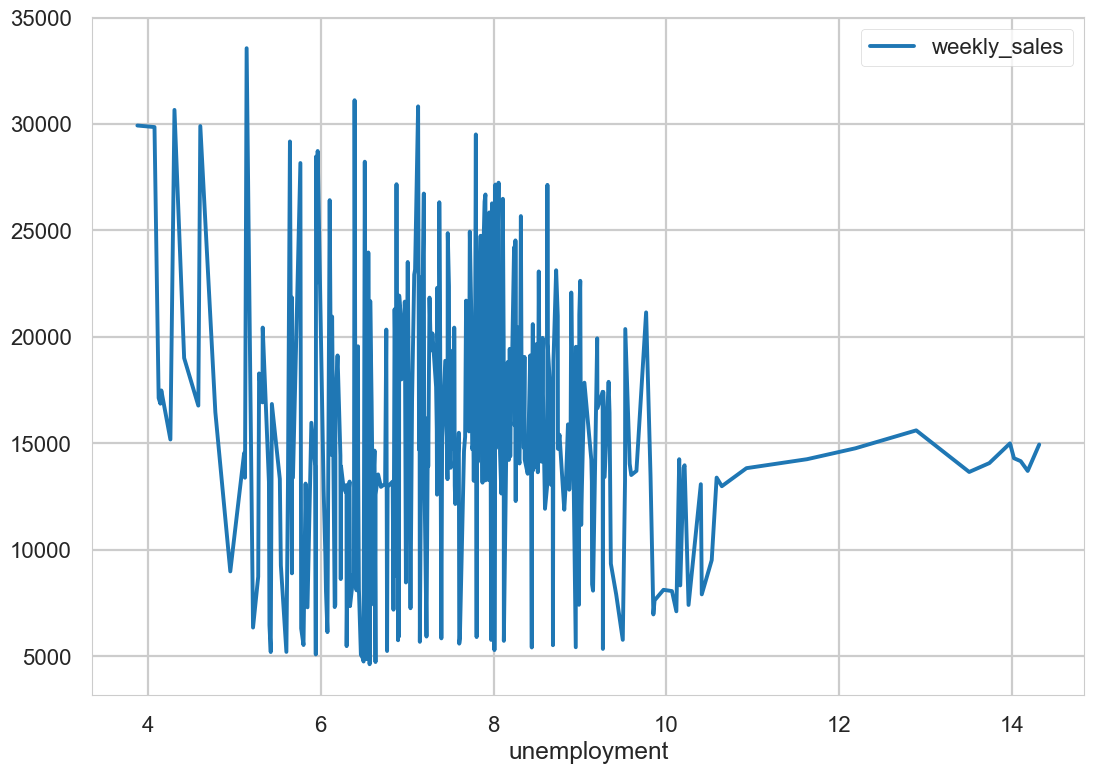

In [205]:
unemployment = pd.pivot_table(df, values = "weekly_sales", index= "unemployment")
unemployment.plot();

## Check for stationarity using visual inspection

### Visual Inspection
This involves plotting the time series to look for trends, seasonality, or changes in variance.

#### Plot the Time Series
A stationary series should have a constant mean and variance over time.

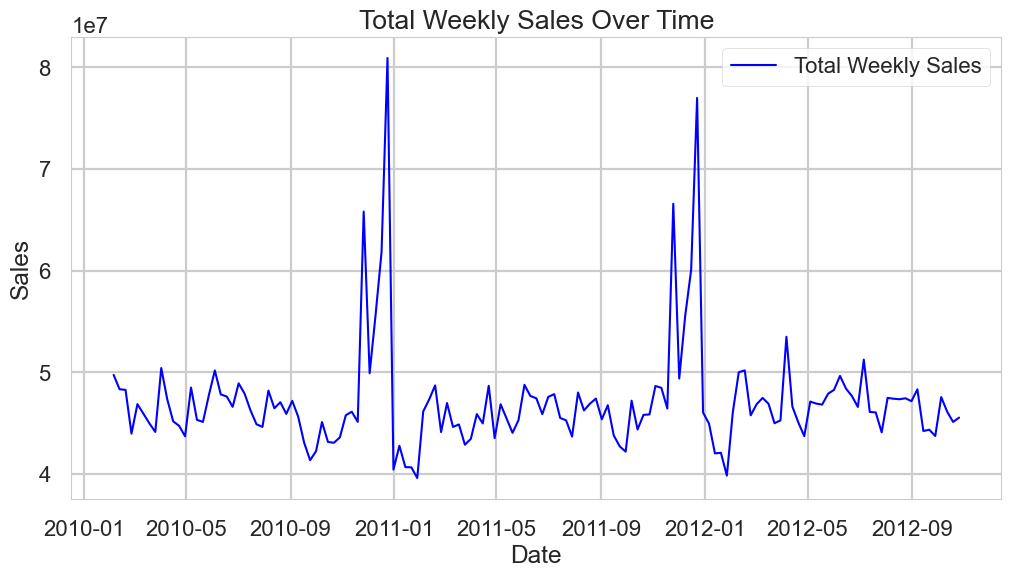

In [206]:
# Aggregate sales across all stores and departments
df_grouped = df.groupby('date')['weekly_sales'].sum()

# Plot the aggregated time series
plt.figure(figsize=(12, 6))
plt.plot(df_grouped, label='Total Weekly Sales', color='blue', linewidth=1.5)
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

**Explanation and Interpretation of The Time Series Plot**
This plot shows total weekly sales over time, which is now aggregated across all stores and departments. Here’s what we can observe:
 * **Trend Analysis**
    * No clear upward or downward trend in overall sales.
    * Some periods show slight fluctuations, but the overall mean seems fairly stable.

 * **Seasonality and Spikes**
    * There are sharp spikes in sales at certain points.
    * These spikes likely correspond to major shopping events like Christmas, Thanksgiving, or promotions.
 * **Variance Analysis**
    * The fluctuations in sales show somewhat constant variance, but the spikes indicate potential non-stationarity.
    * The pre-spike and post-spike behaviors are not uniform, which means sales patterns may shift during specific periods.

### Rolling Statistics
Calculate and plot the rolling mean and rolling standard deviation to check for stability.

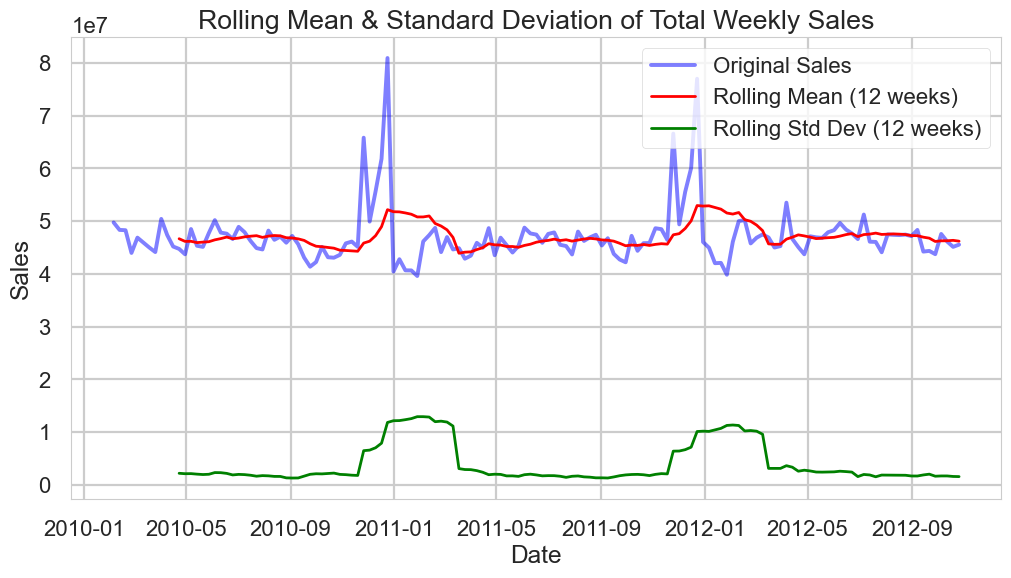

In [207]:
df.set_index('date', inplace=True)  # Set date as index for easier time series operations

# Group by date and sum sales across all stores
df_grouped = df.groupby('date')['weekly_sales'].sum()

# Compute rolling mean and standard deviation (using a 26-week window)
rolling_window = 12  
rolling_mean = df_grouped.rolling(rolling_window).mean()
rolling_std = df_grouped.rolling(rolling_window).std()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_grouped, label='Original Sales', color='blue', alpha=0.5)
plt.plot(rolling_mean, label=f'Rolling Mean ({rolling_window} weeks)', color='red', linewidth=2)
plt.plot(rolling_std, label=f'Rolling Std Dev ({rolling_window} weeks)', color='green', linewidth=2)

# Labels and title
plt.title("Rolling Mean & Standard Deviation of Total Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

**Interpretation of the Graph**
This graph represents total weekly sales over time, showing the rolling mean (12 weeks) in red and the rolling standard deviation (12 weeks) in green.

**Key Observations**
 * 1. Original Sales (Blue Line)
   * The sales data fluctuates over time with noticeable spikes around early 2011 and 2012.
   * These spikes could correspond to seasonal effects like holiday sales, promotions, or major events.

 * 2. Rolling Mean (Red Line) – Trend Indicator
   * The rolling mean helps smooth out short-term fluctuations and highlights the overall trend.
   * It remains relatively stable, except for a noticeable increase in early 2011 and another peak in early 2012.
   * After each peak, it declines slightly before stabilizing.
   * This suggests that sales experience periodic increases, likely due to seasonal influences.

 * 3. Rolling Standard Deviation (Green Line) – Volatility Indicator
   * The rolling standard deviation measures how much sales fluctuate over time.
   * It remains low and stable for most of the period.
   * However, it spikes significantly in early 2011 and early 2012, indicating high volatility during those times.
   * This confirms that the spikes in sales are accompanied by increased uncertainty and variability.

**Is the Data Stationary?**
A time series is stationary if its mean and variance remain constant over time.

 * **Rolling Mean Analysis**
    * The rolling mean is not completely flat—it shows some fluctuations.
    * Significant shifts around early 2011 and early 2012 suggest the presence of trends or seasonality.

 * **Rolling Standard Deviation Analysis**
    * The standard deviation spikes at certain points, meaning variance is not constant over time.
    * This suggests that sales volatility changes over time, which is a sign of non-stationarity.

**Conclusion:**
 * The data does not appear to be stationary because:
   * The rolling mean is not constant (it shifts over time).
   * The rolling standard deviation shows fluctuations (it spikes at certain points).

# CHECK FOR STATIONARITY

## Perform the Augmented Dickey-Fuller (ADF) test to determine if the series is stationary.
This test checks for a unit root. If the p-value < 0.05, we reject the null hypothesis, meaning the series is stationary.

In [208]:
result = adfuller(df_grouped)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("The series is stationary (reject H0)")
else:
    print("The series is non-stationary (fail to reject H0)")

ADF Statistic: -5.908396926989717
p-value: 2.674617664967155e-07
Critical Values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}
The series is stationary (reject H0)


## KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test
This test assumes stationarity as the null hypothesis. If the p-value < 0.05, we reject the null hypothesis and conclude the series is non-stationary.

In [209]:
kpss_result = kpss(df_grouped, regression='c')
print("KPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])
print("Critical Values:", kpss_result[3])

if kpss_result[1] < 0.05:
    print("The series is non-stationary (reject H0)")
else:
    print("The series is stationary (fail to reject H0)")

KPSS Statistic: 0.04889156792706568
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is stationary (fail to reject H0)


C:\Users\lilwa\AppData\Local\Temp\ipykernel_20596\423050754.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(df_grouped, regression='c')


# Identify ARIMA Parameters (p, d, q)
 * Use Autocorrelation Function (ACF) to determine the MA(q) term.
 * Use Partial Autocorrelation Function (PACF) to determine the AR(p) term.
 * Determine the differencing order (d) based on stationarity tests.
 * Optionally, use auto_arima to select optimal parameters.

##  Determine "d" (Order of Differencing)
The value of d represents how many times the data needs to be differenced to become stationary.If the ADF test (p-value < 0.05) suggests stationarity → d = 0.If non-stationary, apply first-order differencing (d=1) and retest.If still non-stationary, try second-order differencing (d=2).
The p-value gotten was 2.674617664967155e-07 so our d will be 0

## Determine "p" (Auto-Regressive Order) using PACF
The Partial Autocorrelation Function (PACF) helps identify p, which represents the number of lagged observations influencing the next value.

We use the plot_pacf() function to visualize the Partial Autocorrelation of the time series.

In [210]:
from statsmodels.graphics.tsaplots import plot_pacf

<Figure size 1000x500 with 0 Axes>

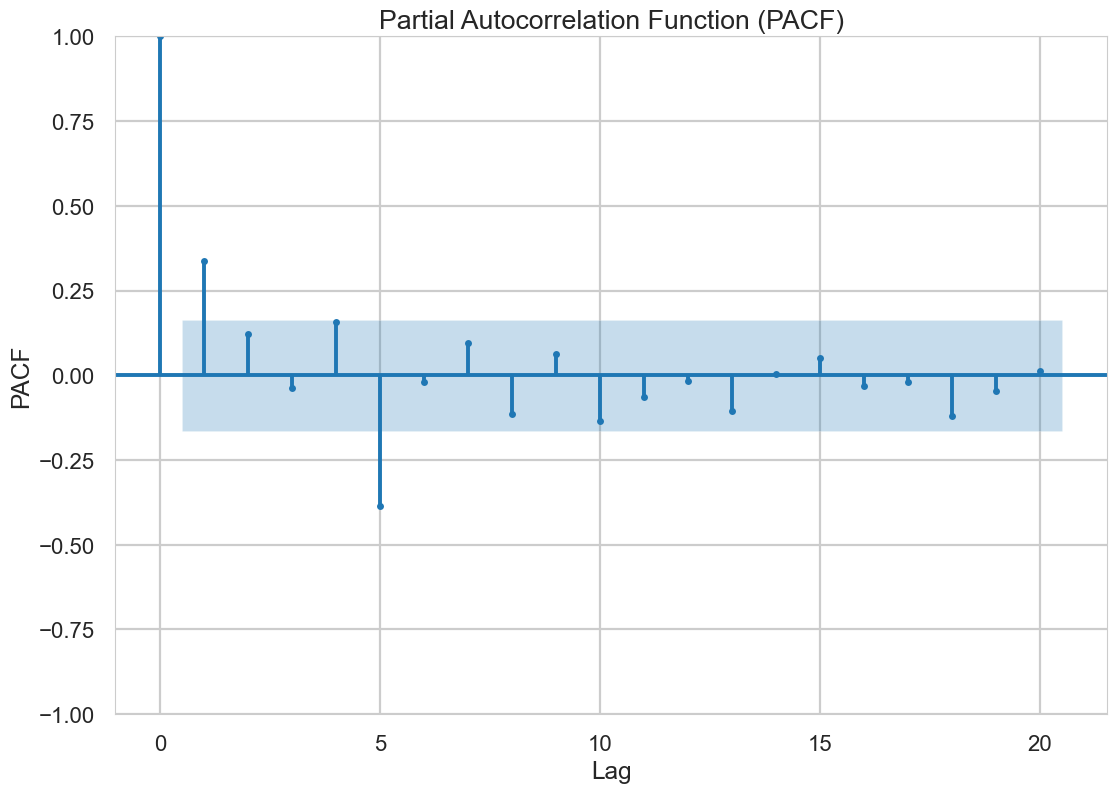

In [211]:
# Plot the PACF to determine p
plt.figure(figsize=(10, 5))
plot_pacf(df_grouped, lags=20)  # Adjust lags if needed
plt.title("Partial Autocorrelation Function (PACF)")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

Partial Autocorrelation Function (PACF) plot helps in determining the autoregressive (AR) order "p" for your ARIMA model. Here’s how to interpret it:

**Observations:**
 * Lag 0: Always has a value of 1 since it represents the correlation of the series with itself.
 * Significant Lags: Look at the spikes outside the blue confidence interval, as they indicate significant partial correlations.
 * Cutoff Point: The point where the PACF drops to within the confidence interval and remains there helps determine "p".

**Interpretation:**
 * In your PACF plot, you see a strong spike at lag 1, and possibly a few smaller spikes at higher lags.
 * The PACF seems to drop within the confidence bounds after lag 1, suggesting that the process has an AR structure.
 * This pattern typically indicates an AR(1) process, meaning that "p" in your ARIMA(p,d,q) model is likely 1.
 * If there were significant spikes at multiple lags, it might suggest a higher AR order.

**Conclusion:**
Your ARIMA order (p, d, q) so far:
 * d=0 (since your time series is already stationary based on ADF test)
 * p=1 (based on PACF plot)
Next, you should check the q value by plotting the Autocorrelation Function (ACF).

## Determine "q" (Moving Average Order) using ACF
The Autocorrelation Function (ACF) helps identify q, which represents the number of past error terms included in the model.

In [212]:
from statsmodels.graphics.tsaplots import plot_acf

# # Plot the ACF
# plt.figure(figsize=(10,6))
# plot_acf(time_series, lags=20)
# plt.show()


<Figure size 800x500 with 0 Axes>

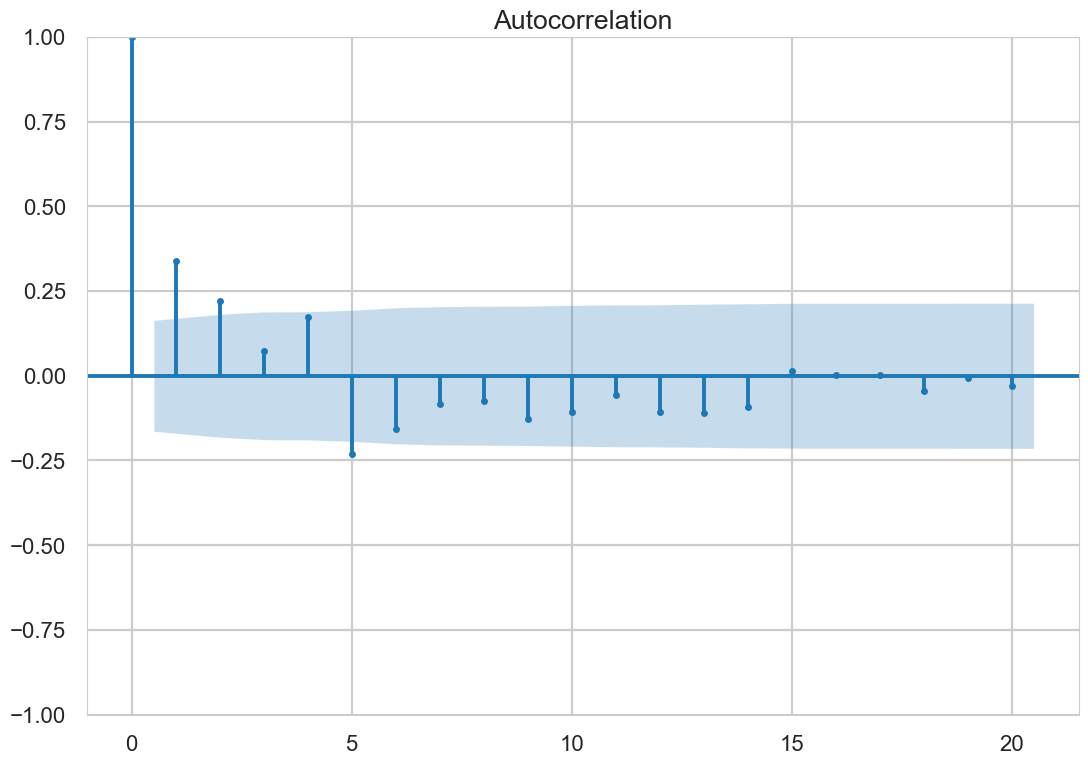

In [213]:
plt.figure(figsize=(8,5))
plot_acf(df_grouped, lags=20)
plt.show()

**Interpretation of the ACF Plot:**
The Autocorrelation Function (ACF) plot helps in determining the q value (the order of the MA component) in your ARIMA(p, d, q) model.

**Observations:**
 * Lag 0: As expected, the first spike at lag 0 is always 1.

**Significant Lags:**
* There are a few significant spikes at lag 1 and lag 2 before the ACF gradually tapers off.
 * After lag 2, the autocorrelations seem to die down within the confidence interval (blue shaded area).
 * This suggests that the Moving Average (MA) component is contributing to the process.

**Conclusion:**
 * Since the ACF cuts off sharply around lag 2, this suggests an MA(2) process.
 * Thus, q = 2 is a reasonable choice for your ARIMA model.

**Final ARIMA Order:**
 * Based on our analysis:
   * p = 1 (from the PACF plot)
   * d = 0 (from the ADF test)
   * q = 2 (from the ACF plot)

So, your final ARIMA(1,0,2) model seems like a good starting point!

In [214]:
# from pmdarima import auto_arima

# # Find best ARIMA parameters
# model = auto_arima(df_grouped, seasonal=False, trace=True, stepwise=True)

# # Print best (p, d, q)
# print(model.summary())

# Fit the ARIMA Model


## Train the ARIMA model on historical data

In [228]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

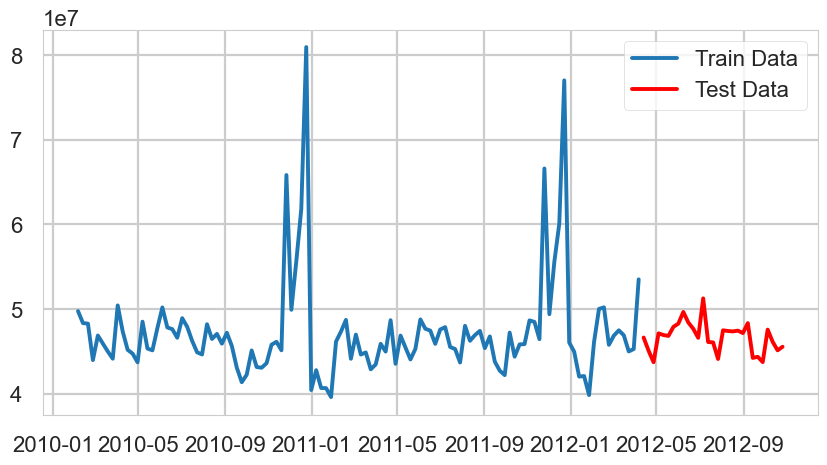

In [216]:
# Train-Test Split 
split_ratio = 0.8
split_index = int(len(df_grouped) * split_ratio)

train = df_grouped.iloc[:split_index]  # First 80% as training set
test = df_grouped.iloc[split_index:]   # Last 20% as test set

plt.figure(figsize=(10, 5))
plt.plot(train, label="Train Data")
plt.plot(test, label="Test Data", color="red")
plt.legend()
plt.show()

In [217]:
#Train ARIMA Model
model = ARIMA(train, order=(1,0,2))  # Choose (p, d, q) based on the results i got above
model_fit = model.fit()

C:\Users\lilwa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lilwa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lilwa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


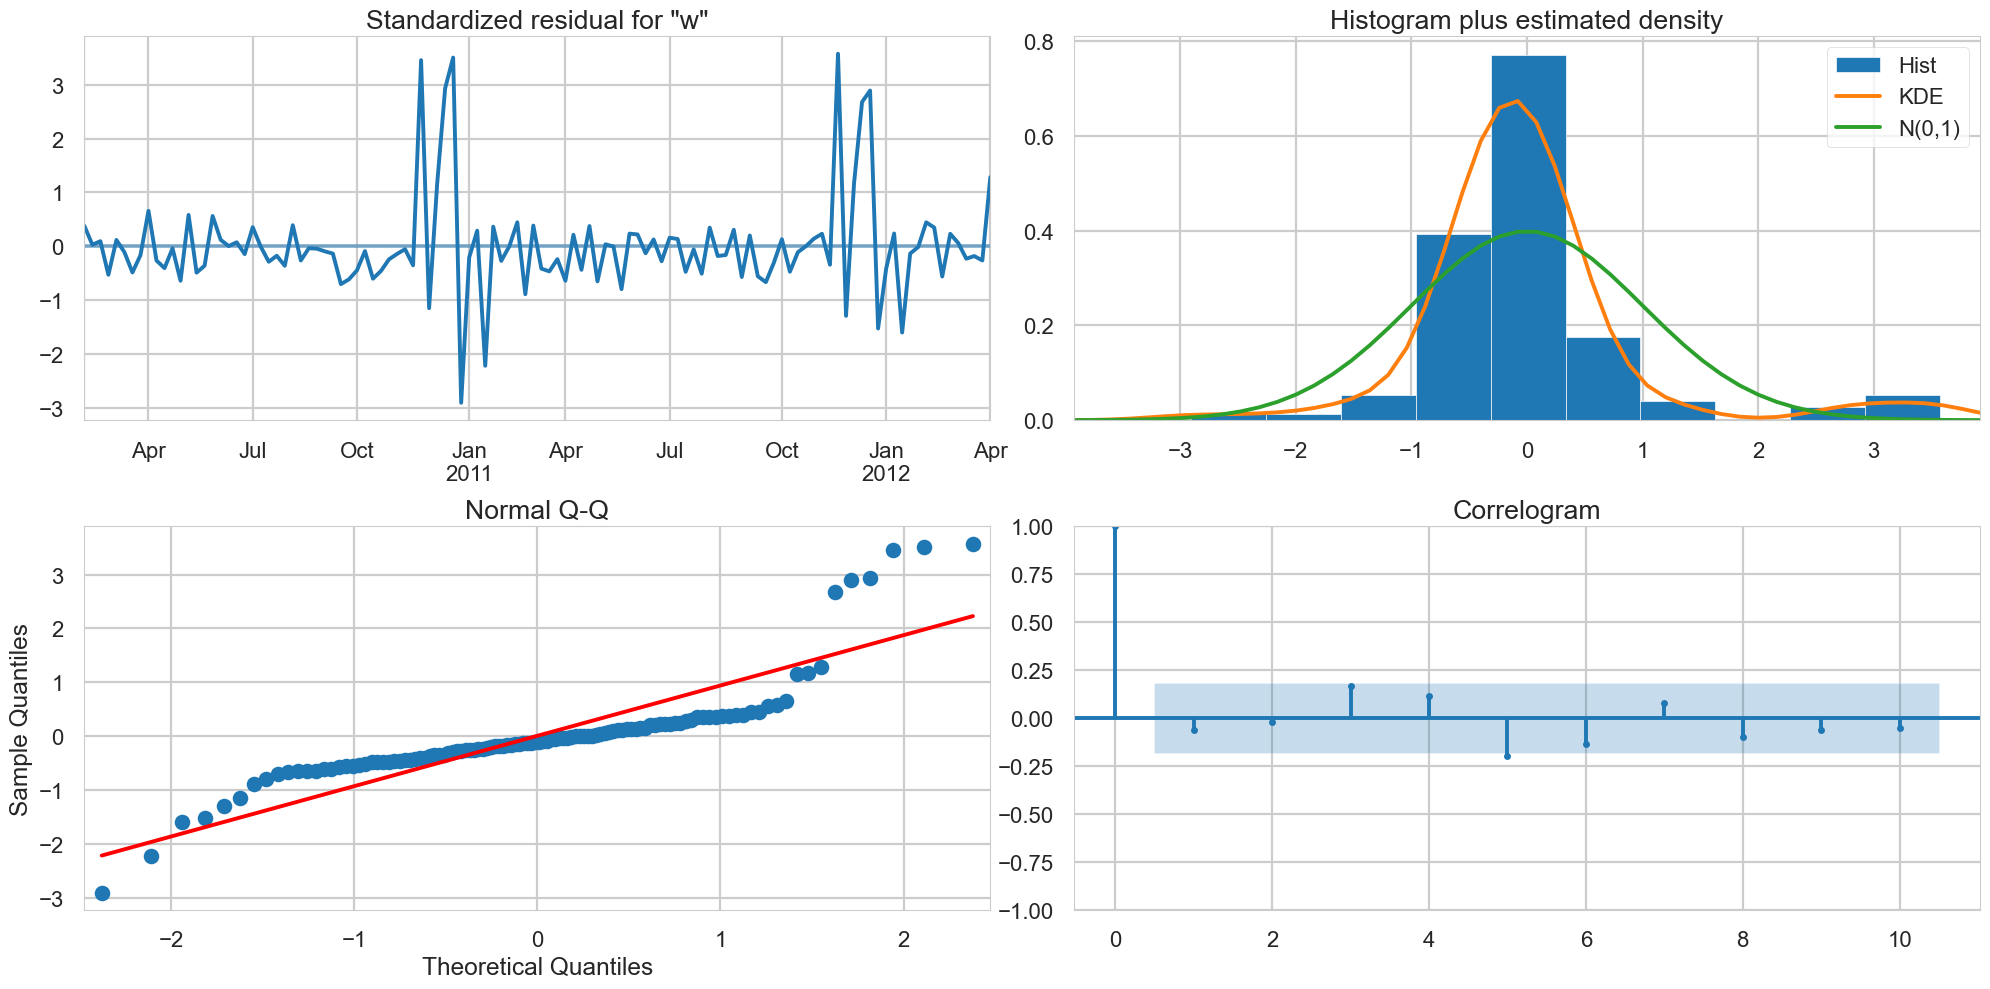

In [223]:
# Check Model Diagnostics Before Evaluating Performance
model_fit.plot_diagnostics(figsize=(20, 10))
plt.tight_layout()
plt.show()

**Standardized Residuals (Top-Left Plot)**
**What It Shows:**
 * The residuals (errors) over time.
 * Ideally, they should fluctuate randomly around zero without patterns.

**Interpretation:**
 * Some spikes around Jan 2011 and Jan 2012 indicate potential outliers or structural changes in the data.
 * However, aside from those, residuals seem relatively stable.

**Histogram + KDE (Top-Right Plot)**
**What It Shows:**
 * The distribution of residuals.
 * The orange KDE (Kernel Density Estimation) line represents the estimated density.
 * The green curve shows a normal distribution (N(0,1)) for comparison.

**Interpretation:**
 * Residuals are roughly normal, but there's some skewness and heavier tails.
 * This suggests that errors are not perfectly normal, which could slightly affect forecast confidence.

**Normal Q-Q Plot (Bottom-Left Plot)**
**What It Shows:**
 * Compares residuals to a normal distribution.
 * If residuals are normal, they should fall along the red diagonal line.

**Interpretation:**
 * The deviation at the tails means some residuals are not normally distributed.
 * This might indicate outliers or non-linearity in the data.

**Correlogram (Bottom-Right Plot)**
**What It Shows:**
 * The Autocorrelation Function (ACF) of residuals.
 * Checks if residuals have patterns (they shouldn’t!).

**Interpretation:**
 * All bars fall inside the blue confidence bands, meaning residuals are not significantly autocorrelated.
 * This is a good sign because ARIMA assumes residuals are random (white noise).

# Model Evaluation

In [230]:
# predicting using the test
ypred = model_fit.forecast(steps=len(test))

# Evaluate Performance
mae = mean_absolute_error(test, ypred)
mse = mean_squared_error(test, ypred)
mape = np.mean(np.abs((test - ypred) / test)) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 1571392.82
MSE: 4089386407701.62
MAPE: 3.40%
r2: -0.37%


**Interpreting Your ARIMA Model Results**
 * Mean Absolute Error (MAE): 1,571,392.82
   * This means, on average, your forecasted values are off by about 1.57 million.
   * Lower MAE is better. If this is too high, consider tuning ARIMA parameters.

 * Mean Squared Error (MSE): 4.09 Trillion (4,089,386,407,701.62)
   * Since MSE squares the errors, larger errors are penalized more.
   * The large value suggests some extreme deviations between predicted and actual values.

 * Mean Absolute Percentage Error (MAPE): 3.40%
 * Best metric for interpretability because it’s a percentage.
 * A MAPE of 3.4% is quite good!
 * This means, on average, your model’s predictions are off by 3.4% of the actual value.

**What Do These Results Mean?**
 * Your model's percentage error (MAPE) is low, meaning it's fairly accurate relative to the scale of the data.
 * Bad news: The absolute error (MAE) and squared error (MSE) are quite large. This could mean:
     * Your dataset has high variance (big fluctuations in sales).
     * There could be seasonality (try SARIMA if applicable).
     * Your model might benefit from tuning p, d, q values.

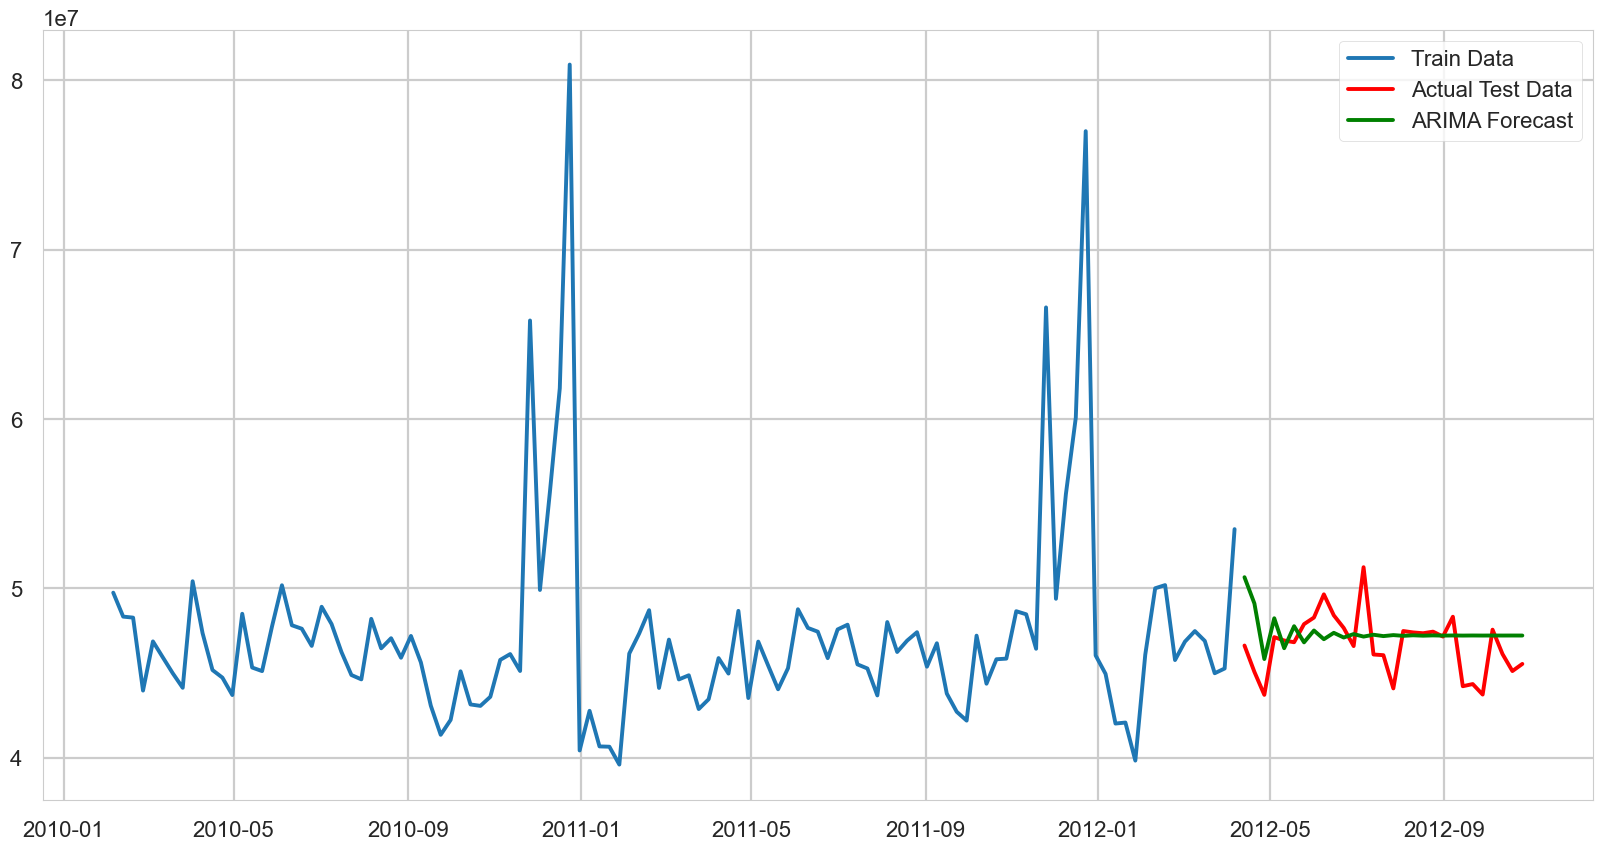

In [232]:
# actual vs predicted
plt.figure(figsize=(20,10))
plt.plot(train, label="Train Data")
plt.plot(test, label="Actual Test Data", color="red")
plt.plot(test.index, forecast, label="ARIMA Forecast", color="green")
plt.legend()
plt.show()

**Interpretation**
**Understanding the Components**
 * Blue Line (Train Data): Represents the historical data used for training the ARIMA model.
 * Red Line (Actual Test Data): The real observed values in the test period, used for evaluating the model.
 * Green Line (ARIMA Forecast): The predicted values generated by the ARIMA model for the test period.

**Key Observations**
 * **Historical Data (Blue Line)**
    * The training data exhibits fluctuations with some significant peaks and drops.
    * There are large spikes, possibly indicating seasonality or sudden external events impacting the data.

 * **Forecast Performance (Green vs. Red)**
    * The ARIMA forecast (green line) closely follows the test data (red line), indicating a reasonable prediction accuracy.
    * There are some mismatches, where the actual values deviate from the forecast, but the general trend is captured well.
    * The model appears to have smoothed out fluctuations, which could mean it’s struggling to capture short-term variations.

**What This Tells Us**
 * Good Fit in General:
   * The forecast aligns reasonably with actual test data, suggesting that the ARIMA model is capturing the overall pattern well.

 * Potential Issues:
   * Sharp spikes in training data
   * Forecast appears flat after some time 

# Forecast Future Values
 * Forecast future time periods (e.g., next 12 weeks).
 * Plot forecasted values along with historical data.

C:\Users\lilwa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lilwa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\lilwa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


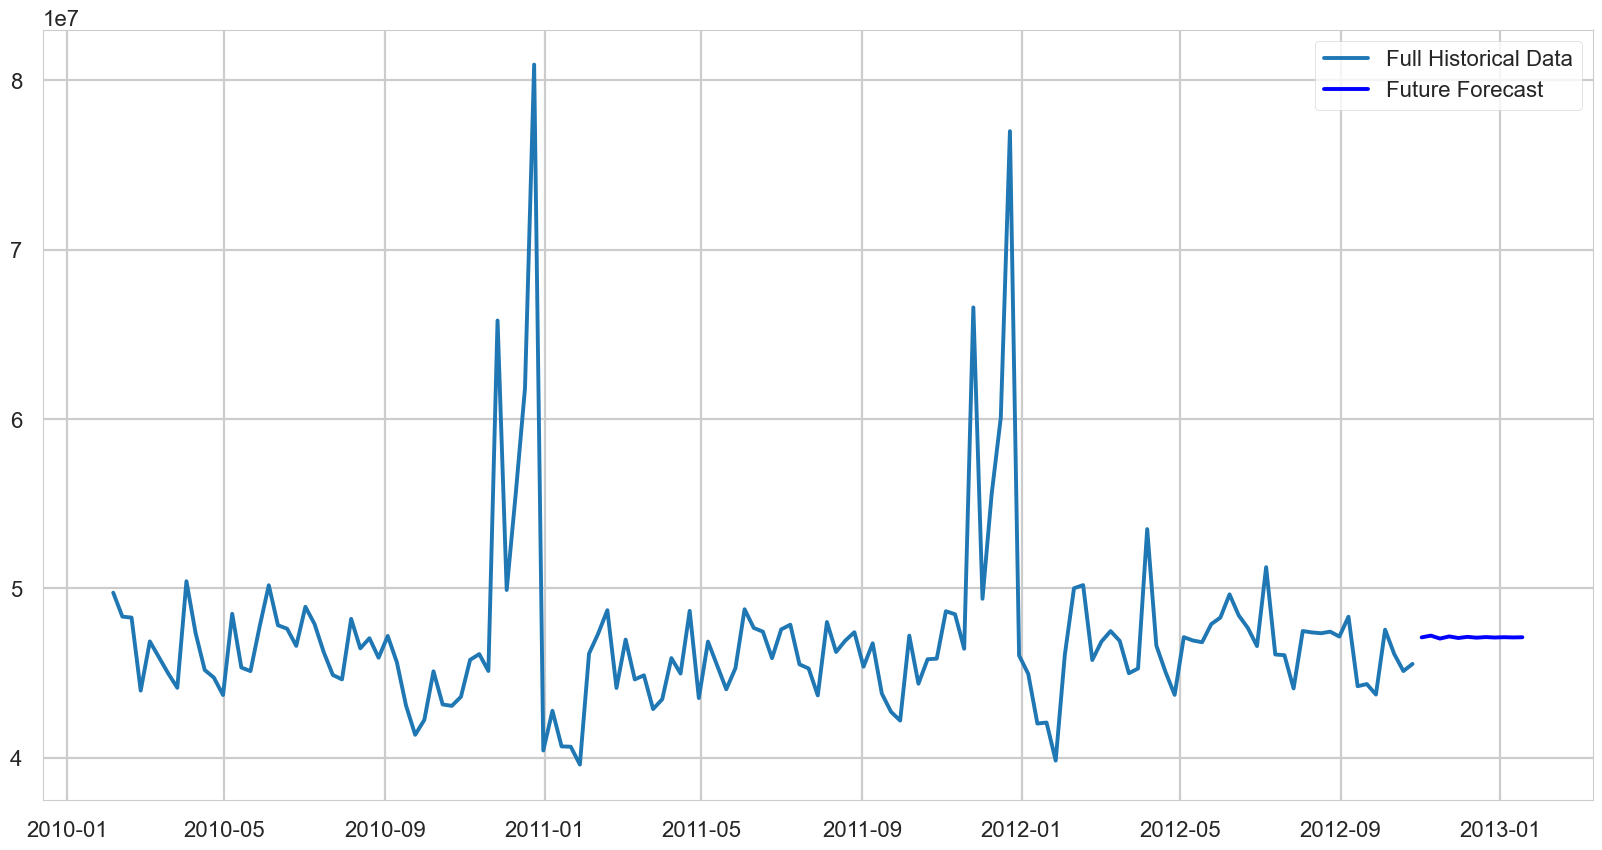

In [251]:
# Retrain ARIMA on Full Data
final_model = ARIMA(df_grouped, order=(1,0,2))  # Use same (p, d, q)
final_model_fit = final_model.fit()

# Forecast Future Values (e.g., next 12 periods)
future_steps = 12
future_forecast = final_model_fit.forecast(steps=future_steps)

# Create a date index for future predictions
future_dates = pd.date_range(start=df_grouped.index[-1], periods=future_steps+1, freq="W-FRI")[1:]

# Plot Final Forecast
plt.figure(figsize=(20,10))
plt.plot(df_grouped, label="Full Historical Data")
plt.plot(future_dates, future_forecast, label="Future Forecast", color="blue")
plt.legend()
plt.show()

In [253]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# model_holt_winters = ExponentialSmoothing(train_data, seasonal_periods=20, seasonal='additive',
#                                            trend='additive',damped=True).fit() #Taking additive trend and seasonality.
# y_pred = model_holt_winters.forecast(len(test_data))# Predict the test data

# #Visualize train, test and predicted data.
# plt.figure(figsize=(20,6))
# plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
# plt.plot(train_data, label='Train')
# plt.plot(test_data, label='Test')
# plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
# plt.legend(loc='best')
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Weekly Sales', fontsize=14)
# plt.show()

In [252]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# import matplotlib.pyplot as plt
# import pandas as pd

# # Fit Holt-Winters Model
# final_model = ExponentialSmoothing(
#     df_grouped, 
#     trend="add",       # Use "add" for an additive trend, or "mul" for multiplicative
#     seasonal="add",    # Use "add" for additive seasonality, or "mul" for multiplicative
#     seasonal_periods=52  # Adjust based on the dataset’s seasonality (e.g., 52 weeks for weekly data)
# )

# final_model_fit = final_model.fit()

# # Forecast Future Values (e.g., next 12 periods)
# future_steps = 12
# future_forecast = final_model_fit.forecast(steps=future_steps)

# # Create a date index for future predictions
# future_dates = pd.date_range(start=df_grouped.index[-1], periods=future_steps+1, freq="W-FRI")[1:]

# # Plot Final Forecast
# plt.figure(figsize=(20, 10))
# plt.plot(df_grouped, label="Full Historical Data")
# plt.plot(future_dates, future_forecast, label="Future Forecast", color="blue")
# plt.legend()
# plt.show()